In [1]:
# This is the import cell
import sys
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import matplotlib.ticker as ticker
from collections import OrderedDict
from scipy import stats
from PIL import Image
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import pylab as plot
first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)



# Here are my rc parameters for matplotlibf
fsize = 20
mpl.rc('font', serif='Helvetica Neue')
#mpl.rc('font', serif='Times New Roman')
mpl.rcParams.update({'font.size': fsize})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['axes.linewidth'] = 1.5
# Set x tick params
mpl.rcParams['xtick.major.size'] = 4.5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 3.
mpl.rcParams['xtick.minor.width'] = 1.25
# Set y tick params
mpl.rcParams['ytick.major.size'] = 4.5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 3.
mpl.rcParams['ytick.minor.width'] = 1.25
mpl.rcParams['legend.fontsize']= 20.
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams["font.family"] = "Times New Roman"
# Load LaTeX and amsmath
# mpl.rc('text', usetex=True)
# mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [2]:
# Get the current path
if first:
    parent = os.getcwd()
print(parent)
# Grab file names from data folder
dens = os.listdir('../../../../../../../../Volumes/External/txt_files/random_txt_files/radial')
try:
    dens.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
    
# Grab the MCS data
pres2 = os.listdir('../../../../../../../../Volumes/External/txt_files/random_txt_files/BubComp2')
try:
    pres2.remove('.DS_Store')
except:
    print(".DS_Store not in directory")

# Grab the MCS data
pres3 = os.listdir('../../../../../../../../Volumes/External/txt_files/random_txt_files/PhaseComp2')
try:
    pres3.remove('.DS_Store')
except:
    print(".DS_Store not in directory")

/Users/nicklauersdorf/klotsa/ABPs/post_proc/Jupyter
.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory


In [3]:
# Some functions to get the relevant data from the filenames
def checkFile(fname, string):
    for i in range(len(fname)):
        if fname[i] == string[0]:
#             print"{} matches {}".format(fname[i], string[0])
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
#                     print"{} matches {}".format(fname[i+j], string[j])
                    if j == (len(string) - 1):
#                         print"Final match!"
                        return True
                else:
                    break
    return False
    
def txtValue(fname, string):
    out = ""
    index = 0
    for i in range(len(fname)):
        if fname[i] == string[0]:
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
                    if j == (len(string) - 1):
                        # Last index of search string
                        index = i + j
                else:
                    break
                        
    # First index of value
    index += 1
    mybool = True
    while mybool:
        if fname[index].isdigit():
            out = out + fname[index]
            index += 1
        elif fname[index] == ".":    
            if fname[index+1].isdigit():
                out = out + fname[index]
                index += 1
            else:
                mybool = False
        else:
            mybool = False
    return float(out)

# Sorting functions
def multiSort(arr1, arr2, arr3, arr4):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    cpy4 = np.copy(arr4)
    ind = np.arange(0, len(arr1))
    for i in range(len(cpy1)):
        for j in range(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] == cpy3[j] and cpy4[i] > cpy4[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in range(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [4]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in dens:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 
                
# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(dens, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_dens = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/random_txt_files/radial')
for i in dens:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_dens.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_dens[0])

,tauB,sizeBin,clust_size,interface_id,bub_id,r_min,r_max,align,alignA,alignB,num_dens,num_densA,num_densB,press,pressA,pressB
0,0.0,5.016308,5,0,0,0.000000,3.045615,-0.060410,-0.012555,-0.130598,1.269702,0.754958,0.514744,-7.196370,-0.473938,-6.722432
1,0.0,5.016308,5,0,0,3.045615,6.091230,0.051455,0.165337,-0.058868,1.441283,0.709203,0.732080,1.553244,5.862868,-4.309624
2,0.0,5.016308,5,0,0,6.091230,9.136846,0.016156,-0.015971,0.053695,1.413830,0.761821,0.652009,2.892582,-0.608358,3.500939
3,0.0,5.016308,5,0,0,9.136846,12.182461,0.044373,0.018476,0.075691,1.397162,0.764763,0.632400,5.493170,0.706501,4.786670
4,0.0,5.016308,5,0,0,12.182461,15.228076,-0.047705,-0.024314,-0.069884,1.433657,0.697764,0.735893,-5.990987,-0.848279,-5.142708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41953,99.8,5.016308,315,8,4,112.687764,115.733379,-0.026698,-0.063798,0.016501,0.650636,0.350026,0.300611,-0.620507,-1.116549,0.496042
41954,99.8,5.016308,315,8,4,115.733379,118.778994,0.023790,-0.007055,0.061264,0.633737,0.347619,0.286117,1.630256,-0.122617,1.752873
41955,99.8,5.016308,315,8,4,118.778994,121.824610,-0.018157,-0.027815,-0.006921,0.655919,0.352719,0.303199,-0.700401,-0.490549,-0.209852
41956,99.8,5.016308,315,8,4,121.824610,124.870225,-0.005960,-0.013239,0.002670,0.674039,0.365617,0.308423,-0.159678,-0.242018,0.082340


In [5]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params = pd.DataFrame(columns=headers)
for i in range(0, len(all_dens)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params = params.append(df, ignore_index = True)
display(params)

,pe,peA,peB,xA,eps,phi,tauPer_dt
0,0,50,100,50.0,1.0,60.0,0.000001
1,0,50,150,50.0,1.0,60.0,0.000001
2,0,50,200,50.0,1.0,60.0,0.000001
3,0,50,250,50.0,1.0,60.0,0.000001
4,0,50,350,50.0,1.0,60.0,0.000001
...,...,...,...,...,...,...,...
23,0,250,450,50.0,1.0,60.0,0.000001
24,0,250,250,50.0,1.0,60.0,0.000001
25,0,350,350,50.0,1.0,60.0,0.000001
26,0,350,450,50.0,1.0,60.0,0.000001


In [6]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_dens)):
    # Ger rid of NaN in favor of 0
    all_dens[i].fillna(0, inplace=True)

headers=list(all_dens[0])
display(all_dens[0])
print(all_dens[0][headers[1]][0])
print(all_dens[0][headers[2]][0])

,tauB,sizeBin,clust_size,interface_id,bub_id,r_min,r_max,align,alignA,alignB,num_dens,num_densA,num_densB,press,pressA,pressB
0,0.0,5.016308,5,0,0,0.000000,3.045615,-0.060410,-0.012555,-0.130598,1.269702,0.754958,0.514744,-7.196370,-0.473938,-6.722432
1,0.0,5.016308,5,0,0,3.045615,6.091230,0.051455,0.165337,-0.058868,1.441283,0.709203,0.732080,1.553244,5.862868,-4.309624
2,0.0,5.016308,5,0,0,6.091230,9.136846,0.016156,-0.015971,0.053695,1.413830,0.761821,0.652009,2.892582,-0.608358,3.500939
3,0.0,5.016308,5,0,0,9.136846,12.182461,0.044373,0.018476,0.075691,1.397162,0.764763,0.632400,5.493170,0.706501,4.786670
4,0.0,5.016308,5,0,0,12.182461,15.228076,-0.047705,-0.024314,-0.069884,1.433657,0.697764,0.735893,-5.990987,-0.848279,-5.142708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41953,99.8,5.016308,315,8,4,112.687764,115.733379,-0.026698,-0.063798,0.016501,0.650636,0.350026,0.300611,-0.620507,-1.116549,0.496042
41954,99.8,5.016308,315,8,4,115.733379,118.778994,0.023790,-0.007055,0.061264,0.633737,0.347619,0.286117,1.630256,-0.122617,1.752873
41955,99.8,5.016308,315,8,4,118.778994,121.824610,-0.018157,-0.027815,-0.006921,0.655919,0.352719,0.303199,-0.700401,-0.490549,-0.209852
41956,99.8,5.016308,315,8,4,121.824610,124.870225,-0.005960,-0.013239,0.002670,0.674039,0.365617,0.308423,-0.159678,-0.242018,0.082340


5.016308
5


In [7]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres2:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres2, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/random_txt_files/BubComp2')
for i in pres2:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new[-1])
print(storeVals)

,tauB,sizeBin,clust_size,int_id,bub_id,Na,Nb,radius,radius_err,sa_ext,sa_int,edge_width,edge_width_err,edge_begin,edge_end,NBin
0,0.0,5.016308,45750,1,1,15705,15515,93.914608,1.861855,611.364629,404.927523,39.430506,4.316719,54.484101,93.914608,853
1,0.1,5.016308,46021,1,1,14850,14697,82.884619,1.377431,541.019989,320.401332,33.372678,1.535488,49.511941,82.884619,660
2,0.2,5.016308,46458,1,1,14856,14663,84.236476,1.188504,547.059434,326.715860,33.437139,1.629779,50.799337,84.236476,673
3,0.3,5.016308,46576,1,1,14595,14554,84.676592,1.529403,551.143905,338.060060,32.391782,1.639879,52.284810,84.676592,663
4,0.4,5.016308,46367,1,1,14517,14504,85.866414,1.841334,562.662630,348.089928,32.670564,2.541268,53.195850,85.866414,682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,99.4,5.016308,43296,1,1,9543,9403,88.673112,6.679194,600.382238,481.471927,21.521177,4.849941,67.151935,88.673112,555
1005,99.5,5.016308,43282,1,1,9584,9420,87.187941,6.807261,595.448710,474.988403,20.566850,5.468027,66.621091,87.187941,528
1006,99.6,5.016308,43256,1,1,9776,9651,87.878271,7.350654,612.547137,475.782221,21.736063,3.754774,66.142209,87.878271,555
1007,99.7,5.016308,43140,1,1,9168,9109,86.990295,6.840993,596.203878,476.399941,19.835932,8.229860,67.154363,86.990295,513


[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 150.0, 150.0, 150.0, 150.0, 150.0, 200.0, 200.0, 200.0, 200.0, 250.0, 250.0, 250.0, 350.0, 350.0, 450.0], [100.0, 150.0, 200.0, 250.0, 350.0, 450.0, 50.0, 100.0, 150.0, 200.0, 250.0, 350.0, 450.0, 450.0, 350.0, 150.0, 200.0, 250.0, 200.0, 250.0, 350.0, 450.0, 350.0, 450.0, 250.0, 350.0, 450.0, 450.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 

In [8]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params3 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params3 = params3.append(df, ignore_index = True)
display(params3)

,pe,peA,peB,xA,eps,phi,tauPer_dt
0,0,50,100,50.0,1.0,60.0,0.000001
1,0,50,150,50.0,1.0,60.0,0.000001
2,0,50,200,50.0,1.0,60.0,0.000001
3,0,50,250,50.0,1.0,60.0,0.000001
4,0,50,350,50.0,1.0,60.0,0.000001
...,...,...,...,...,...,...,...
23,0,250,450,50.0,1.0,60.0,0.000001
24,0,250,250,50.0,1.0,60.0,0.000001
25,0,350,350,50.0,1.0,60.0,0.000001
26,0,350,450,50.0,1.0,60.0,0.000001


In [9]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new)):
    # Ger rid of NaN in favor of 0
    all_pres_new[i].fillna(0, inplace=True)

headers=list(all_pres_new[0])
display(all_pres_new[0])
print(all_pres_new[0][headers[1]][0])
print(all_pres_new[0][headers[2]][0])

,tauB,sizeBin,clust_size,int_id,bub_id,Na,Nb,radius,radius_err,sa_ext,sa_int,edge_width,edge_width_err,edge_begin,edge_end,NBin
0,0.0,5.016308,16892,0,0,16656,16638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2054
1,0.0,5.016308,16892,0,1,8344,8362,66.145435,0.923795,427.467884,0.000000,0.000000,0.000000,0.000000,0.000000,547
2,0.1,5.016308,16699,1,1,7851,7880,62.242037,1.965411,450.019642,147.813019,39.367783,2.664504,22.874254,62.242037,486
3,0.2,5.016308,17057,1,1,7798,7927,61.279127,1.920267,409.411172,148.014735,38.777544,1.954458,22.501583,61.279127,474
4,0.3,5.016308,17354,1,1,8252,8425,64.620688,2.418925,432.660735,145.337864,42.275733,2.716989,22.344955,64.620688,532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4569,99.8,5.016308,16870,8,8,8660,10964,75.092335,15.959068,643.825445,118.404645,57.322740,16.915204,17.769596,75.092335,758
4570,99.8,5.016308,16870,8,1,1529,1329,19.118285,8.914877,161.319870,0.000000,0.000000,0.000000,0.000000,0.000000,158
4571,99.8,5.016308,16870,8,12,270,220,11.545970,3.440139,88.598572,0.000000,0.000000,0.000000,0.000000,0.000000,26
4572,99.8,5.016308,16870,8,2,248,232,6.977220,1.375605,46.470764,0.000000,0.000000,0.000000,0.000000,0.000000,26


5.016308
16892


In [10]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres3:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres3, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new2 = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/random_txt_files/PhaseComp2')
for i in pres3:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new2.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new2[-1])
print(storeVals)

,tauB,sizeBin,clust_size,Na_bulk,Nb_bulk,NBin_bulk,Na_gas,Nb_gas,NBin_gas,Na_int,Nb_int,NBin_int,Na_bub,Nb_bub,NBin_bub
0,0.0,5.016308,45750,7365,7510,326,1930,1975,1422,15705,15515,853,0,0,0
1,0.1,5.016308,46021,8296,8441,268,1854,1862,1673,14850,14697,660,0,0,0
2,0.2,5.016308,46458,8586,8734,284,1558,1603,1644,14856,14663,673,0,0,0
3,0.3,5.016308,46576,8831,8949,302,1574,1497,1636,14595,14554,663,0,0,0
4,0.4,5.016308,46367,8818,8945,311,1665,1551,1608,14517,14504,682,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,99.4,5.016308,43296,12496,12582,501,2961,3015,1545,9543,9403,555,0,0,0
995,99.5,5.016308,43282,12385,12456,494,3031,3124,1579,9584,9420,528,0,0,0
996,99.6,5.016308,43256,12236,12288,486,2988,3061,1560,9776,9651,555,0,0,0
997,99.7,5.016308,43140,12700,12710,504,3132,3181,1584,9168,9109,513,0,0,0


[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 150.0, 150.0, 150.0, 150.0, 150.0, 200.0, 200.0, 200.0, 200.0, 250.0, 250.0, 250.0, 350.0, 350.0, 450.0], [100.0, 150.0, 200.0, 250.0, 350.0, 450.0, 50.0, 100.0, 150.0, 200.0, 250.0, 350.0, 450.0, 250.0, 150.0, 200.0, 350.0, 450.0, 200.0, 250.0, 350.0, 450.0, 450.0, 250.0, 350.0, 450.0, 350.0, 450.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 

In [11]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params4 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new2)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params4 = params4.append(df, ignore_index = True)
display(params4)

,pe,peA,peB,xA,eps,phi,tauPer_dt
0,0,50,100,50.0,1.0,60.0,0.000001
1,0,50,150,50.0,1.0,60.0,0.000001
2,0,50,200,50.0,1.0,60.0,0.000001
3,0,50,250,50.0,1.0,60.0,0.000001
4,0,50,350,50.0,1.0,60.0,0.000001
...,...,...,...,...,...,...,...
23,0,250,250,50.0,1.0,60.0,0.000001
24,0,250,350,50.0,1.0,60.0,0.000001
25,0,350,450,50.0,1.0,60.0,0.000001
26,0,350,350,50.0,1.0,60.0,0.000001


In [12]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new2)):
    # Ger rid of NaN in favor of 0
    all_pres_new2[i].fillna(0, inplace=True)

headers=list(all_pres_new2[0])
display(all_pres_new2[0])
print(all_pres_new2[0][headers[1]][0])
print(all_pres_new2[0][headers[2]][0])

,tauB,sizeBin,clust_size,Na_bulk,Nb_bulk,NBin_bulk,Na_gas,Nb_gas,NBin_gas,Na_int,Nb_int,NBin_int,Na_bub,Nb_bub,NBin_bub
0,0.0,5.016308,16892,0,0,0,16656,16638,2054,16656,16638,2054,-8312,-8276,-1507
1,0.1,5.016308,16699,1066,999,49,16083,16121,2066,7851,7880,486,0,0,0
2,0.2,5.016308,17057,1107,1043,47,16095,16030,2080,7798,7927,474,0,0,0
3,0.3,5.016308,17354,1080,1016,46,15668,15559,2023,8252,8425,532,0,0,0
4,0.4,5.016308,17644,1135,1079,50,15297,15138,1976,8568,8783,575,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,99.4,5.016308,17347,739,1272,58,13267,11150,1528,8364,10367,734,2630,2211,281
995,99.5,5.016308,17377,189,380,16,11361,9413,1315,9025,11413,783,4425,3794,487
996,99.6,5.016308,17457,316,534,24,10804,9011,1254,11151,13109,1034,2729,2346,289
997,99.7,5.016308,16897,478,782,35,13937,11635,1596,7657,10112,652,2928,2471,318


5.016308
16892


In [13]:
# All data is loaded, now compute analytical aspects
r_cut = (2.**(1./6.))

# Get lattice spacing for particle size
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / sigma) * ((2*(div**13)) - (div)**7)
    return dU

# # Lennard-Jones pressure
# def ljPress(r, eps, sigma=1.):
#     phiCP = np.pi / (2. * np.sqrt(3.))
#     div = (sigma/r)
#     dU = (24. * eps / r) * ((2.*(div**12.)) - (div)**6.)
#     # This is just pressure divided by the area of a particle
# #     return (12. * dU / (np.pi * r))
#     return (12. * dU / (np.pi * r * phiCP))

def ljPress(r, pe, eps, sigma=1.):
    phiCP = np.pi / (2. * np.sqrt(3.))
    # This is off by a factor of 1.2...
    ljF = avgCollisionForce(pe)
    return (2. *np.sqrt(3) * ljF / r)
    
def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    peCritical = 40.
    if pe < peCritical:
        pe = 0
    else:
        pe -= peCritical
    magnitude = 6.
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
#     return (magnitude * (pe**power)) / (np.pi)
#     return (pe * (1. + (8./(np.pi**2.))))
    coeff = 1.92#2.03#3.5#2.03
    #coeff= 0.4053
    return (pe * coeff)

def fStar(pe, epsilon, sigma=1.):
    out = (avgCollisionForce(pe) * sigma) / (24.*epsilon)
    return out
    
def conForRClust(pe, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out

def nonDimFLJ(r, sigma=1.):
    div = (sigma/r)
    dU = ((2*(div**13)) - (div)**7)
    return dU

def latForFStar(fstar):
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while nonDimFLJ(r) < fstar:
            r -= j
        r += j
    out = r
    return out
    
def latToPhi(latIn):
    '''Read in lattice spacing, output phi'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)

# From area fraction, get lattice spacing
def phiToLat(phiIn):
    '''Read in phi, output the lattice spacing'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    latCP = 1.
    return np.sqrt(phiCP / phiIn)
    
def compPhiG(pe, a, kap=4.5, sig=1.):
    num = 3. * (np.pi**2) * kap * sig
    den = 4. * pe * a
    return num / den
    
def clustFrac(phi, phiG, a, sig=1.):
    phiL = latToPhi(a)
    ApL = np.pi * (sig**2) / 4.
    Ap = np.pi * (sig**2) / 4.
    num = (phiL*phiG) - (phiL*phi)
    den = (phi*phiG) - (phi*phiL)
    ans = num / den
    return ans

def radCurve(area):
    # From area of circle get curvature
    return np.sqrt(area/np.pi)

def radCirc(circ):
    return circ / (2. * np.pi)

In [14]:
# Let's use analytical theory and kinetic theory to get cluster radius
epsRange = [1., 0.1, 0.01, 0.001, 0.0001]
# epsRange = [0.0001, 0.001, 0.01, 0.1, 1.]
peRange = np.arange(0., 700., 1.)
phiRange = [0.45, 0.55, 0.65]
N = 100000.
norm = 10.**0.
# norm = 1.

phiCP = np.pi / (2. * np.sqrt(3))
lat = []
pColl = []
pLJ = []
cfs = []
Rls = []
peCrit = []
phiGs = []
phiCPs = []
a_box = []
l_box = []
for b in range(0, len(phiRange)):
    lat.append([])
    phiCPs.append([])
    pColl.append([])
    pLJ.append([])
    cfs.append([])
    Rls.append([])
    phiGs.append([])
    peCrit.append([])
    a_box.append(N * np.pi * 0.25 / phiRange[b])
    l_box.append(np.sqrt(a_box[-1]))
    for i in range(0, len(epsRange)):
        lat[b].append([])
        phiCPs[b].append([])
        pColl[b].append([])
        pLJ[b].append([])
        cfs[b].append([])
        Rls[b].append([])
        phiGs[b].append([])
        for j in range(0, len(peRange)):
            # Compute lattice spacing
        
            lat[b][i].append(conForRClust(peRange[j], epsRange[i]))
            phiCPs[b][i].append(latToPhi(lat[b][i][-1]))
            # Compute pressure
            #curPLJ = ljPress(lat[b][i][-1], epsRange[i]) / (np.pi * (lat[b][i][-1]**2) * 0.25 * phiCP)
            #curPLJ = ljPress(lat[b][i][-1], epsRange[i]) / (np.pi * (lat[b][i][-1]**2) * 0.25 * phiCP * (lat[b][i][-1]**(0.5)) * 1.25)
            curPLJ = ljPress(lat[b][i][-1], peRange[j], epsRange[i])
            
            # Append to list
            pLJ[b][i].append(curPLJ/(norm))

            # Compute cluster fraction
            phiG = compPhiG(peRange[j], lat[b][i][-1])
            phiGs[b][i].append(phiG)
            if peRange[j] > 35.:
                cf = clustFrac(phiRange[b], phiG, lat[b][i][-1])
                if cf < 0. or cf > 1.:
                    cf = 0.
            else:
                cf = 0
            cfs[b][i].append(cf)

            # Get the critical activity
            if j > 0:
                if cfs[b][i][-2] == 0. and cfs[b][i][-1] > 0.:
                    peCrit[b].append(peRange[j])

            # Get the radius (for some N)
            Nl = cfs[b][i][-1] * N
            Al = Nl * ((np.pi * (lat[b][i][-1]**2))/(4*phiCP))
            Rl = np.sqrt(Al / (np.pi))
            Rls[b][i].append(Rl)

<ipython-input-13-5f46f5e34eab>:86: RuntimeWarning: divide by zero encountered in double_scalars
  return num / den


In [18]:
align_peA=np.array([])
align_peB=np.array([])
align_peNet=np.array([])
first_align_peNet=np.array([])
first_interpart_peNet=np.array([])
first_interpart_peA=np.array([])
first_interpart_peB=np.array([])

align_xA=np.array([])
align_eps=np.array([])
align_pnum=np.array([])
align_phi=np.array([])
align_press_arr = np.array([])
first_align_press = np.array([])
first_bulk_press = np.array([])
first_align_peA=np.array([])
first_align_peB=np.array([])

width_peA=np.array([])
width_peB=np.array([])
width_peNet=np.array([])
width_xA=np.array([])
width_eps=np.array([])
width_pnum=np.array([])
width_phi=np.array([])

interpart_peA=np.array([])
interpart_peB=np.array([])
interpart_peNet=np.array([])
interpart_xA=np.array([])
interpart_eps=np.array([])
interpart_pnum=np.array([])
interpart_phi=np.array([])
interpart_press=np.array([])
interpart_press_expand=np.array([])
avg_shear=np.array([])
fastCol = '#e31a1c'
slowCol = '#081d58'

avg_rad = np.array([])
avg_width = np.array([])
avg_clust = np.array([])
avg_circularity = np.array([])

bulk_lat_time_mean = np.array([])
int_lat_time_mean = np.array([])
all_lat_time_mean = np.array([])
bulk_lat_time_std = np.array([])
int_lat_time_std = np.array([])
all_lat_time_std = np.array([])
from scipy.optimize import curve_fit


avg_bulk_nA = np.array([])
avg_bulk_nB = np.array([])
avg_bulk_n = np.array([])
avg_dense_nA = np.array([])
avg_dense_nB = np.array([])
avg_dense_n = np.array([])
avg_int_n = np.array([])
avg_int_nA = np.array([])
avg_int_nB = np.array([])
avg_gas_nA = np.array([])
avg_gas_nB = np.array([])
avg_gas_n = np.array([])

align_type = np.array([])
interpart_type = np.array([])

width_type = np.array([])

radius_arr_final = np.linspace(0,1.4,num=30)
num_dens_arr_final = np.zeros(30)
align_arr_final = np.zeros(30)
press_arr_final = np.zeros(30)
final_count = np.zeros(30)
final_count_count = np.zeros(30)

avg_int_theory_arr = np.array([])
avg_bulk_theory_arr = np.array([])
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / sigma) * ((2*(div**13)) - (div)**7)
    return dU

def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    peCritical = 40.
    if pe < peCritical:
        pe = 0
    else:
        pe -= peCritical
    magnitude = 6.
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
#     return (magnitude * (pe**power)) / (np.pi)
#     return (pe * (1. + (8./(np.pi**2.))))
    coeff = 1.92#3.0#1.92#2.03#3.5#2.03
    #coeff= 0.4053
    return (pe * coeff)

def conForRClust(pe, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out
def densProbability(r, activity_net, activity_slow):
    "Using similar triangles to find sides"
    gas_dense_dif_phi = 0.866 * np.log10(activity_net - 46.993) - 0.443
    rate_decay = -6.151 * np.log10(activity_net-49.921) - 4.392
    mid_point = 0.044 * np.log10(activity_slow-49.893) + 0.836
    gas_phi = -0.26 * np.log10(activity_slow-41.742)+0.783
    
    num_dens_r = ((gas_dense_dif_phi / (1+np.exp(-rate_decay * (r-mid_point)))) + gas_phi)
    
    return num_dens_r

def alignProbability(r, activity_net, activity_slow):
    "Using similar triangles to find sides"
    max_align = 0.2019 * np.log10(activity_net - 41.2803) - 0.1885
    mid_point = 0.0492 * np.log10(activity_slow - 47.0061) + 0.8220
    std_dev = 0.1057
    align_r = max_align * np.exp(-(r-mid_point)**2/(2*std_dev**2))
    
    return align_r
A_mean = np.array([])
B_mean = np.array([])
A_avg_time_arr = np.array([])
B_avg_time_arr = np.array([])
A_std = np.array([])
B_std = np.array([])
pe_int_mean = np.array([])
pe_gas_mean = np.array([])
pe_bulk_mean = np.array([])
pe_dense_mean = np.array([])
peA_arr = np.array([])
peB_arr = np.array([])
alpha_max_mean = np.array([])
int_width_mean = np.array([])
for i in range(0, len(all_dens)):
    if (params['peA'][i]>0) & (params['peB'][i]>0):
        #if (params['peA'][i]!=50) & (params['peB'][i]!=50):
            print('start')
            print(params['peA'][i])
            print(params['peB'][i])
            if all_dens[i].empty:
                continue

            for l in range(0, len(all_pres_new)):
                if all_pres_new[l].empty:
                    continue
                if params3['peA'][l]==params['peA'][i]:
                    if params3['peB'][l]==params['peB'][i]:

                        #if pres2[k][0:4]==dens[i][0:4]:

                            for q in range(0, len(all_pres_new2)):

                                if all_pres_new2[q].empty:
                                    continue
                                #if pres3[q][0:4]==dens[i][0:4]:
                                if params4['peA'][q]==params['peA'][i]:
                                    if params4['peB'][q]==params['peB'][i]:
                                        A_arr = np.array([])
                                        B_arr = np.array([])
                                        A_arr2 = np.array([])
                                        B_arr2 = np.array([])

                                        time_i = all_dens[i]['tauB']
                                        time_l = all_pres_new[l]['tauB']
                                        time_q = all_pres_new2[q]['tauB']

                                        #Instantiate arrays for reading in number density .txt file
                                        bulk_nA_arr = np.array([])
                                        bulk_nB_arr = np.array([])
                                        bulk_n_arr = np.array([])
                                        int_n_arr = np.array([])
                                        int_nA_arr = np.array([])
                                        int_nB_arr = np.array([])
                                        gas_nA_arr = np.array([])
                                        gas_n_arr = np.array([])
                                        gas_nB_arr = np.array([])
                                        dense_nA_arr = np.array([])
                                        dense_nB_arr = np.array([])
                                        dense_n_arr = np.array([])

                                        #Instantiate arrays for reading in lattice spacing .txt file
                                        bulk_lat_mean = np.array([])
                                        int_lat_mean = np.array([])
                                        all_lat_mean = np.array([])
                                        bulk_lat_std = np.array([])
                                        int_lat_std = np.array([])
                                        all_lat_std = np.array([])

                                        rat_edge_arr = 0
                                        rat_edge_val = 0

                                        time_dens = np.array([])
                                        time_arr = np.array([])
                                        radius_arr = np.array([])
                                        align_arr = np.array([])
                                        num_dens_arr = np.array([])
                                        press_arr = np.array([])
                                        align_max_arr = np.array([])
                                        int_width_arr = np.array([])
                                        time_align_arr = np.array([])





                                        #Loop over time in interface pressure .txt file
                                        for j in range(0, len(time_i)):



                                            #Current time in loop
                                            time = time_i[j]
                                            if time>(0):


                                                #Read values and set variables from number density .txt files
                                                time_id_q = np.where(time_q==time)[0]
                                                if len(time_id_q)>0:
                                                    time_id = np.where(time_i==time)[0]
                                                    time_id2 = np.where(time_l==time)[0]
                                                    if len(time_id2)>0:

                                                        if len(time_id2)==1:
                                                            edge_width = all_pres_new[l]['radius'][time_id2[0]]
                                                            edge_width2 = all_pres_new[l]['edge_width'][time_id2[0]]
                                                            nB = all_pres_new[l]['Nb'][time_id2[0]]
                                                            nA = all_pres_new[l]['Na'][time_id2[0]]
                                                            rat_edge = (edge_width - edge_width2) / edge_width
                                                            rat_edge_arr+= rat_edge
                                                            rat_edge_val += 1

                                                        elif len(time_id2)>1:
                                                            edge_width = np.max(all_pres_new[l]['radius'][time_id2])
                                                            edge_width2 = np.max(all_pres_new[l]['edge_width'][time_id2[0]])
                                                            rat_edge = (edge_width - edge_width2) / edge_width
                                                            rat_edge_arr+= rat_edge
                                                            rat_edge_val += 1

                                                            nB = np.max(all_pres_new[l]['Nb'][time_id2])
                                                            nA = np.max(all_pres_new[l]['Na'][time_id2])
                                                        if time not in time_arr:
                                                            time_arr = np.append(time_arr, time)  

                                                            bin_size = all_pres_new2[q]['sizeBin'][time_id_q]
                                                            bin_area = bin_size**2
                                                            bulk_nA_arr = np.append(bulk_nA_arr, all_pres_new2[q]['Na_bulk'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                                                            bulk_nB_arr = np.append(bulk_nB_arr, all_pres_new2[q]['Nb_bulk'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                                                            bulk_n_arr = np.append(bulk_n_arr, (all_pres_new2[q]['Nb_bulk'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                                                            int_n_arr = np.append(int_n_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Nb_int'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                                                            int_nA_arr = np.append(int_nA_arr, all_pres_new2[q]['Na_int'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                                                            int_nB_arr = np.append(int_nB_arr, all_pres_new2[q]['Nb_int'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                                                            gas_n_arr = np.append(gas_n_arr, (all_pres_new2[q]['Na_gas'][time_id_q] + all_pres_new2[q]['Nb_gas'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                                                            gas_nA_arr = np.append(gas_nA_arr, all_pres_new2[q]['Na_gas'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                                                            gas_nB_arr = np.append(gas_nB_arr, all_pres_new2[q]['Nb_gas'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                                                            dense_n_arr = np.append(dense_n_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Nb_int'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]+all_pres_new2[q]['Nb_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))
                                                            dense_nA_arr = np.append(dense_nA_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))
                                                            dense_nB_arr = np.append(dense_nB_arr, (all_pres_new2[q]['Nb_int'][time_id_q]+all_pres_new2[q]['Nb_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))

                                                            if len(time_arr)>=2:


                                                                if len(radius_arr)>0:
                                                                    if np.max(radius_arr)<edge_width:
                                                                        num_dens_arr_temp = np.zeros(30)
                                                                        align_arr_temp = np.zeros(30)
                                                                        press_arr_temp = np.zeros(30)

                                                                        for k in range(0, len(radius_arr_final)-1):
                                                                            rad_where = np.where((radius_arr_final[k]<=radius_arr) & (radius_arr<radius_arr_final[k+1]))[0]
                                                                            if len(rad_where)>0:
                                                                                nonzero_align = np.where(align_arr[rad_where]!=0)[0]
                                                                                if len(nonzero_align)>0:
                                                                                    press_arr_final[k]+=np.mean(press_arr[rad_where][nonzero_align])
                                                                                    align_arr_final[k]+=np.mean(align_arr[rad_where][nonzero_align])
                                                                                    num_dens_arr_final[k]+=np.mean(num_dens_arr[rad_where][nonzero_align])
                                                                                    final_count[k]+=1
                                                                                    final_count_count[k]+=len(rad_where)

                                                                                    press_arr_temp[k]=np.mean(press_arr[rad_where][nonzero_align])
                                                                                    align_arr_temp[k]=np.mean(align_arr[rad_where][nonzero_align])
                                                                                    num_dens_arr_temp[k]=np.mean(num_dens_arr[rad_where][nonzero_align])
                                                                                    #temp_count[k]+=1
                                                                                    #temp_count_count[k]+=len(rad_where)

                                                                        align_max_arr = np.append(align_max_arr, np.max(align_arr_temp))
                                                                        int_width_arr = np.append(int_width_arr, edge_width2)
                                                                        time_align_arr = np.append(time_align_arr, time)
                                                                        fastSim = '#de2d26'
                                                                        fastTheory = '#fc9272'
                                                                        slowSim = '#3182bd'
                                                                        slowTheory = '#9ecae1'
                                                                        fsize=10

                                                                        slowTheory = '#081d58'
                                                                        fastTheory = '#e31a1c'
                                                                        press_arr_fit = press_arr_temp
                                                                        align_arr_fit = align_arr_temp
                                                                        num_dens_arr_fit = num_dens_arr_temp

                                                                        peNet_int = np.mean((int_nA_arr[-1]/int_n_arr[-1]) * float(params['peA'][i]) + (int_nB_arr[-1]/int_n_arr[-1]) * float(params['peB'][i]))

                                                                        #latNet_int = np.zeros(len(peNet_int))
                                                                        phi_cp = np.pi / (2*np.sqrt(3))
                                                                        #for z in range(0, len(peNet_int)):
                                                                        latNet_int = conForRClust(peNet_int-50, 1.0)

                                                                        phid_theory = (phi_cp / latNet_int**2) / (np.pi/4)


                                                                        phig_theory = (((3 * np.pi**2 * 4.5) / 4) * ((latNet_int * peNet_int)**(-1))) / (np.pi/4)


                                                                        def Gauss4(x, A, B):
                                                                            y = (phig_theory-phid_theory)/(1+np.exp(A*(x-B)))+phid_theory
                                                                            return y
                                                                        def Gauss(x, A, B, C):
                                                                            y = A*np.exp(-(x-B)**2/(2*C**2))
                                                                            return y

                                                                        rad_max = np.where(num_dens_arr_fit!=0)[0]


                                                                        '''
                                                                        parameters, covariance = curve_fit(Gauss4, radius_arr_final[rad_max], num_dens_arr_fit[rad_max])
                                                                        parameters2, covariance2 = curve_fit(Gauss, radius_arr_final[rad_max], align_arr_fit[rad_max])
                                                                        fit_A = parameters[0]
                                                                        #fit_B = parameters[1]
                                                                        fit_B = parameters[1]
                                                                        
                                                                        fit_A2 = parameters2[0]
                                                                        #fit_B = parameters[1]
                                                                        fit_B2 = parameters2[1]

                                                                        A_arr = np.append(A_arr, fit_A)
                                                                        B_arr = np.append(B_arr, fit_B)
                                                                        
                                                                        A_arr2 = np.append(A_arr2, fit_A2)
                                                                        B_arr2 = np.append(B_arr2, fit_B2)
                                                                        '''

                                                                        radius_arr = np.append(radius_arr, all_dens[i]['r_max'][j]/edge_width)   
                                                                        align_arr = np.append(align_arr, all_dens[i]['align'][j])   
                                                                        num_dens_arr = np.append(num_dens_arr, all_dens[i]['num_dens'][j])   
                                                                        press_arr = np.append(press_arr, all_dens[i]['press'][j])  

                                                            else:
                                                                radius_arr = np.array([])
                                                                align_arr = np.array([])
                                                                num_dens_arr = np.array([])
                                                                press_arr = np.array([])
                                                                radius_arr = np.append(radius_arr, all_dens[i]['r_max'][j]/edge_width)   
                                                                align_arr = np.append(align_arr, all_dens[i]['align'][j])   
                                                                num_dens_arr = np.append(num_dens_arr, all_dens[i]['num_dens'][j])   
                                                                press_arr = np.append(press_arr, all_dens[i]['press'][j])  



                                                        else:
                                                            radius_arr = np.append(radius_arr, all_dens[i]['r_max'][j]/edge_width)   
                                                            align_arr = np.append(align_arr, all_dens[i]['align'][j])   
                                                            num_dens_arr = np.append(num_dens_arr, all_dens[i]['num_dens'][j])   
                                                            press_arr = np.append(press_arr, all_dens[i]['press'][j]) 


                                        fastSim = '#de2d26'
                                        fastTheory = '#fc9272'
                                        slowSim = '#3182bd'
                                        slowTheory = '#9ecae1'
                                        fsize=10
                                        alpha_max_mean = np.append(alpha_max_mean, np.mean(align_max_arr))
                                        int_width_mean = np.append(int_width_mean, np.mean(int_width_arr))

                                        slowTheory = '#081d58'
                                        fastTheory = '#e31a1c'
                                        nonzero = np.where(final_count>0)[0]
                                        press_arr_fit = press_arr_final[nonzero] / final_count[nonzero]
                                        align_arr_fit = align_arr_final[nonzero] / final_count[nonzero]
                                        num_dens_arr_fit = num_dens_arr_final[nonzero] / final_count[nonzero]

                                        peNet_int = np.mean((int_nA_arr/int_n_arr) * float(params['peA'][i]) + (int_nB_arr/int_n_arr) * float(params['peB'][i]))

                                        #latNet_int = np.zeros(len(peNet_int))
                                        phi_cp = np.pi / (2*np.sqrt(3))
                                        #for z in range(0, len(peNet_int)):
                                        latNet_int = conForRClust(peNet_int-50, 1.0)

                                        phid_theory = (phi_cp / latNet_int**2) / (np.pi/4)


                                        phig_theory = (((3 * np.pi**2 * 4.5) / 4) * ((latNet_int * peNet_int)**(-1))) / (np.pi/4)
                                        print(phig_theory)
                                        print(phid_theory)
                                        print(np.mean(dense_n_arr))
                                        print(np.mean(gas_n_arr))


                                        def Gauss4(x, A, B):
                                            y = (phid_theory-phig_theory)/(1+np.exp(A*(x-B)))+phig_theory
                                            return y
                                        def Gauss(x, A, B, C):
                                            y = A*np.exp(-(x-B)**2/(2*C**2))
                                            return y

                                        rad_max = np.where(num_dens_arr_fit!=0)[0]



                                        parameters, covariance = curve_fit(Gauss4, radius_arr_final[nonzero][rad_max], num_dens_arr_fit[rad_max])
                                        parameters2, covariance2 = curve_fit(Gauss, radius_arr_final[nonzero][rad_max], align_arr_fit[rad_max])
                                        #parameters2, covariance2 = curve_fit(Gauss, radius_arr_final, num_dens_arr_temp)
                                        fit_A = parameters[0]
                                        #fit_B = parameters[1]
                                        fit_B = parameters[1]
                                        
                                        fit_A2 = parameters2[0]
                                        fit_B2 = parameters2[1]
                                        fit_C2 = parameters2[2]
                                        '''

                                        fig, ax1 = plt.subplots(figsize=(12,5))
                                        theory_max = np.max(num_dens_arr_fit[rad_max])
                                        sim_max = np.max(num_dens_arr_fit[rad_max])

                                        if sim_max >= theory_max:
                                            plot_max = sim_max+0.1
                                        else:
                                            plot_max = theory_max+0.1


                                        plot_min = 0

                                        step = np.round(np.abs(plot_max - plot_min)/6, 2)


                                        plt.plot(radius_arr_final[nonzero][rad_max], num_dens_arr_fit[rad_max],
                                                       c=slowTheory, lw=1.8*1.8, ls='--', label='Simulation')
                                        plt.plot(radius_arr_final[nonzero][rad_max], Gauss4(radius_arr_final[nonzero][rad_max], fit_A, fit_B),
                                                       c=fastTheory, lw=1.8*1.8, ls='-', label='Fit')

                                        ax1.set_xlim(0, 1.4)        
                                        # y limits


                                        ax1.set_ylim(plot_min, plot_max) 


                                        ax1.set_xlabel(r'Distance from CoM ($x=r/r_c$)', fontsize=fsize*2.8)



                                        ax1.set_ylabel(r'Number Density [$n(x)$]', fontsize=fsize*2.8)


                                        # Set all the x ticks for radial plots
                                        loc = ticker.MultipleLocator(base=0.2)
                                        ax1.xaxis.set_major_locator(loc)
                                        loc = ticker.MultipleLocator(base=0.1)
                                        ax1.xaxis.set_minor_locator(loc)


                                        # Set y ticks
                                        print(step)
                                        loc = ticker.MultipleLocator(base=step)
                                        ax1.yaxis.set_major_locator(loc)
                                        loc = ticker.MultipleLocator(base=round(step/2,3))
                                        ax1.yaxis.set_minor_locator(loc)
                                        # Left middle plot

                                        ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                        ax1.tick_params(axis='y', labelsize=fsize*2.5)
                                        plt.legend(loc='upper right')


                                        plt.tight_layout()
                                        plt.savefig('/Volumes/External/dens_fit_time2/random_fit_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                        plt.close()
                                        
                                        fig, ax1 = plt.subplots(figsize=(12,5))
                                        theory_max = np.max(align_arr_fit[rad_max])
                                        sim_max = np.max(align_arr_fit[rad_max])

                                        if sim_max >= theory_max:
                                            plot_max = sim_max+0.1
                                        else:
                                            plot_max = theory_max+0.1


                                        plot_min = 0

                                        step = np.round(np.abs(plot_max - plot_min)/6, 2)


                                        plt.plot(radius_arr_final[nonzero][rad_max], align_arr_fit[rad_max],
                                                       c=slowTheory, lw=1.8*1.8, ls='--', label='Simulation')
                                        plt.plot(radius_arr_final[nonzero][rad_max], Gauss(radius_arr_final[nonzero][rad_max], fit_A2, fit_B2, fit_C2),
                                                       c=fastTheory, lw=1.8*1.8, ls='-', label='Fit')

                                        ax1.set_xlim(0, 1.4)        
                                        # y limits


                                        ax1.set_ylim(plot_min, plot_max) 


                                        ax1.set_xlabel(r'Distance from CoM ($x=r/r_c$)', fontsize=fsize*2.8)



                                        ax1.set_ylabel(r'Alignment [$\alpha(x)$]', fontsize=fsize*2.8)


                                        # Set all the x ticks for radial plots
                                        loc = ticker.MultipleLocator(base=0.2)
                                        ax1.xaxis.set_major_locator(loc)
                                        loc = ticker.MultipleLocator(base=0.1)
                                        ax1.xaxis.set_minor_locator(loc)


                                        # Set y ticks
                                        print(step)
                                        loc = ticker.MultipleLocator(base=step)
                                        ax1.yaxis.set_major_locator(loc)
                                        loc = ticker.MultipleLocator(base=round(step/2,3))
                                        ax1.yaxis.set_minor_locator(loc)
                                        # Left middle plot

                                        ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                        ax1.tick_params(axis='y', labelsize=fsize*2.5)
                                        plt.legend(loc='upper right')


                                        plt.tight_layout()
                                        plt.savefig('/Volumes/External/align_fit_time2/random_fit_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                        plt.close()
                                        '''
                                        
                                        fig, ax1 = plt.subplots(figsize=(12,5))
                                        
                                        
                                        plot_max = 0.5


                                        plot_min = 0

                                        step = np.round(np.abs(plot_max - plot_min)/6, 2)


                                        plt.plot(time_align_arr, align_max_arr,
                                                       c=slowTheory, lw=1.8*1.8, ls='--', label='Simulation')

                                        ax1.set_xlim(0, 100)        
                                        # y limits


                                        ax1.set_ylim(plot_min, plot_max) 


                                        ax1.set_xlabel(r'Time ($\tau$)', fontsize=fsize*2.8)



                                        ax1.set_ylabel(r'Alignment Max [$\alpha_{max}(x)$]', fontsize=fsize*2.8)


                                        # Set all the x ticks for radial plots
                                        loc = ticker.MultipleLocator(base=10)
                                        ax1.xaxis.set_major_locator(loc)
                                        loc = ticker.MultipleLocator(base=5)
                                        ax1.xaxis.set_minor_locator(loc)


                                        # Set y ticks
                                        print(step)
                                        loc = ticker.MultipleLocator(base=step)
                                        ax1.yaxis.set_major_locator(loc)
                                        loc = ticker.MultipleLocator(base=round(step/2,3))
                                        ax1.yaxis.set_minor_locator(loc)
                                        # Left middle plot

                                        ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                        ax1.tick_params(axis='y', labelsize=fsize*2.5)
                                        plt.legend(loc='upper right')


                                        plt.tight_layout()
                                        plt.savefig('/Volumes/External/align_fit_time2/random_alpha_max_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                        plt.close()
                                        
                                        fig, ax1 = plt.subplots(figsize=(12,5))
                                        
                                        
                                        plot_max = np.max(int_width_arr) + 2


                                        plot_min = np.min(int_width_arr) - 2

                                        step = np.round(np.abs(plot_max - plot_min)/6, 2)


                                        plt.plot(time_align_arr, int_width_arr,
                                                       c=slowTheory, lw=1.8*1.8, ls='--', label='Simulation')

                                        ax1.set_xlim(0, 100)        
                                        # y limits


                                        ax1.set_ylim(plot_min, plot_max) 


                                        ax1.set_xlabel(r'Time ($\tau$)', fontsize=fsize*2.8)



                                        ax1.set_ylabel(r'Interface Width [$h$]', fontsize=fsize*2.8)


                                        # Set all the x ticks for radial plots
                                        loc = ticker.MultipleLocator(base=10)
                                        ax1.xaxis.set_major_locator(loc)
                                        loc = ticker.MultipleLocator(base=5)
                                        ax1.xaxis.set_minor_locator(loc)


                                        # Set y ticks
                                        print(step)
                                        loc = ticker.MultipleLocator(base=step)
                                        ax1.yaxis.set_major_locator(loc)
                                        loc = ticker.MultipleLocator(base=round(step/2,3))
                                        ax1.yaxis.set_minor_locator(loc)
                                        # Left middle plot

                                        ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                        ax1.tick_params(axis='y', labelsize=fsize*2.5)
                                        plt.legend(loc='upper right')


                                        plt.tight_layout()
                                        plt.savefig('/Volumes/External/align_fit_time2/random_int_width_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                        plt.close()



                                        '''
                                        A_avg_time_arr = np.append(A_avg_time_arr, fit_A)
                                        B_avg_time_arr = np.append(B_avg_time_arr, fit_B)



                                        fig, ax1 = plt.subplots(figsize=(12,5))
                                        plot_max = np.max(A_arr)+1


                                        plot_min = np.min(A_arr)-1
                                        print(plot_min)
                                        print(plot_max)
                                        step = np.round(np.abs(plot_max - plot_min)/6, 2)


                                        plt.plot(time_arr[1:], A_arr,
                                                       c=slowTheory, lw=1.8*1.8, ls='--')

                                        ax1.set_xlim(0, 100)        
                                        # y limits


                                        ax1.set_ylim(plot_min, plot_max) 


                                        ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                        ax1.set_ylabel(r'$B_\mathrm{n}$', fontsize=fsize*2.8)


                                        # Set all the x ticks for radial plots
                                        loc = ticker.MultipleLocator(base=20)
                                        ax1.xaxis.set_major_locator(loc)
                                        loc = ticker.MultipleLocator(base=10)
                                        ax1.xaxis.set_minor_locator(loc)


                                        # Set y ticks
                                        print(step)
                                        loc = ticker.MultipleLocator(base=step)
                                        ax1.yaxis.set_major_locator(loc)
                                        loc = ticker.MultipleLocator(base=round(step/2,3))
                                        ax1.yaxis.set_minor_locator(loc)
                                        # Left middle plot

                                        ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                        ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                        plt.tight_layout()
                                        plt.savefig('/Volumes/External/dens_fit_time2/random_fit_a_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                        plt.close()

                                        fig, ax1 = plt.subplots(figsize=(12,5))
                                        plot_max = np.max(B_arr)+0.05


                                        plot_min = np.min(B_arr)-0.05
                                        step = np.round(np.abs(plot_max - plot_min)/6,2)
                                        if step < 0:
                                            step = step * -1


                                        plt.plot(time_arr[1:], B_arr,
                                                       c=slowTheory, lw=1.8*1.8, ls='--')

                                        ax1.set_xlim(0, 100)        
                                        # y limits


                                        ax1.set_ylim(plot_min, plot_max) 


                                        ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                        ax1.set_ylabel(r'$C_\mathrm{n}$', fontsize=fsize*2.8)


                                        # Set all the x ticks for radial plots
                                        loc = ticker.MultipleLocator(base=20)
                                        ax1.xaxis.set_major_locator(loc)
                                        loc = ticker.MultipleLocator(base=10)
                                        ax1.xaxis.set_minor_locator(loc)


                                        # Set y ticks
                                        print(step)
                                        loc = ticker.MultipleLocator(base=step)
                                        ax1.yaxis.set_major_locator(loc)
                                        loc = ticker.MultipleLocator(base=round(step/2,3))
                                        ax1.yaxis.set_minor_locator(loc)
                                        # Left middle plot
                                        ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                        ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                        plt.tight_layout()
                                        plt.savefig('/Volumes/External/dens_fit_time2/random_fit_b_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                        plt.close()
                                        '''


                                        pe_int_mean = np.append(pe_int_mean, np.mean((int_nA_arr/int_n_arr) * float(params['peA'][i]) + (int_nB_arr/int_n_arr) * float(params['peB'][i])))
                                        pe_gas_mean = np.append(pe_gas_mean, np.mean((gas_nA_arr/gas_n_arr) * float(params['peA'][i]) + (gas_nB_arr/gas_n_arr) * float(params['peB'][i])))
                                        pe_bulk_mean = np.append(pe_bulk_mean, np.mean((bulk_nA_arr/bulk_n_arr) * float(params['peA'][i]) + (bulk_nB_arr/bulk_n_arr) * float(params['peB'][i])))
                                        pe_dense_mean = np.append(pe_dense_mean, np.mean((dense_nA_arr/dense_n_arr) * float(params['peA'][i]) + (dense_nB_arr/dense_n_arr) * float(params['peB'][i])))
                                        '''
                                        A_mean = np.append(A_mean, np.mean(A_arr))
                                        B_mean = np.append(B_mean, np.mean(B_arr))
                                        sum_A = 0
                                        for z in range(0, len(A_arr)):
                                            sum_A += (A_arr[z] - A_mean[-1]) ** 2
                                        A_std = np.append(A_std, (sum_A / len(A_arr))**0.5)

                                        sum_B = 0
                                        for z in range(0, len(B_arr)):
                                            sum_B += (B_arr[z] - B_mean[-1]) ** 2
                                        B_std = np.append(B_std, (sum_B / len(B_arr))**0.5)
                                        '''

                                        peA_arr = np.append(peA_arr, params['peA'][i])
                                        peB_arr = np.append(peB_arr, params['peB'][i])
                                        


start
50
100
0.49117473719460114
0.9164864219049506
1.0057660372189772
0.6172850368219542
0.08
25.88
start
50
150
0.39659694647263183
1.2132380243250298
1.2063369112490925
0.5577835825125396
0.08
18.31
start
50
200
0.32289018054095386
1.369415159472478
1.2830090092216533
0.5322089361980211
0.08
13.78
start
50
250
0.2661782010577402
1.4669865288738315
1.3459635451733443
0.5179290189717726
0.08
11.25
start
50
350
0.19925094075493327
1.5870764699078428
1.435159495551005
0.4940154988954751
0.08
11.12
start
50
450
0.16133465135059627
1.6659729916160582
1.4922023372356
0.47700281895072205
0.08
9.75
start
50
50
0.7556870332224089
0.9164864219049506
0.7732111721101503
0.7311153687720668
0.08
0.67
start
100
100
0.41927556613284594
1.12849904003135
1.2139459178564427
0.3583722456583183
0.08
18.75
start
100
150
0.35734974563489563
1.3048478062189521
1.28874008802734
0.32180562715445343
0.08
13.93
start
100
200
0.30384865056361793
1.4026810835315349
1.344736635166044
0.3192121906642449
0.08
10.81


[50. 50.]
[100.  50.]
0.17712003554812045
-0.11066892700297276


<ipython-input-31-eda22345db43>:26: RuntimeWarning: invalid value encountered in log10
  plt.plot(x_span, np.log10((x_span-45))*fit_A + fit_B, color='black', linewidth=1.8*1.8, label=r'$\alpha_\mathrm{max}=$'+str(round(fit_A,2))+r'$\mathrm{log}_{10}(\mathrm{Pe}_\mathrm{Net}^\mathrm{i}-45)+$' + str(round(fit_B,2)))


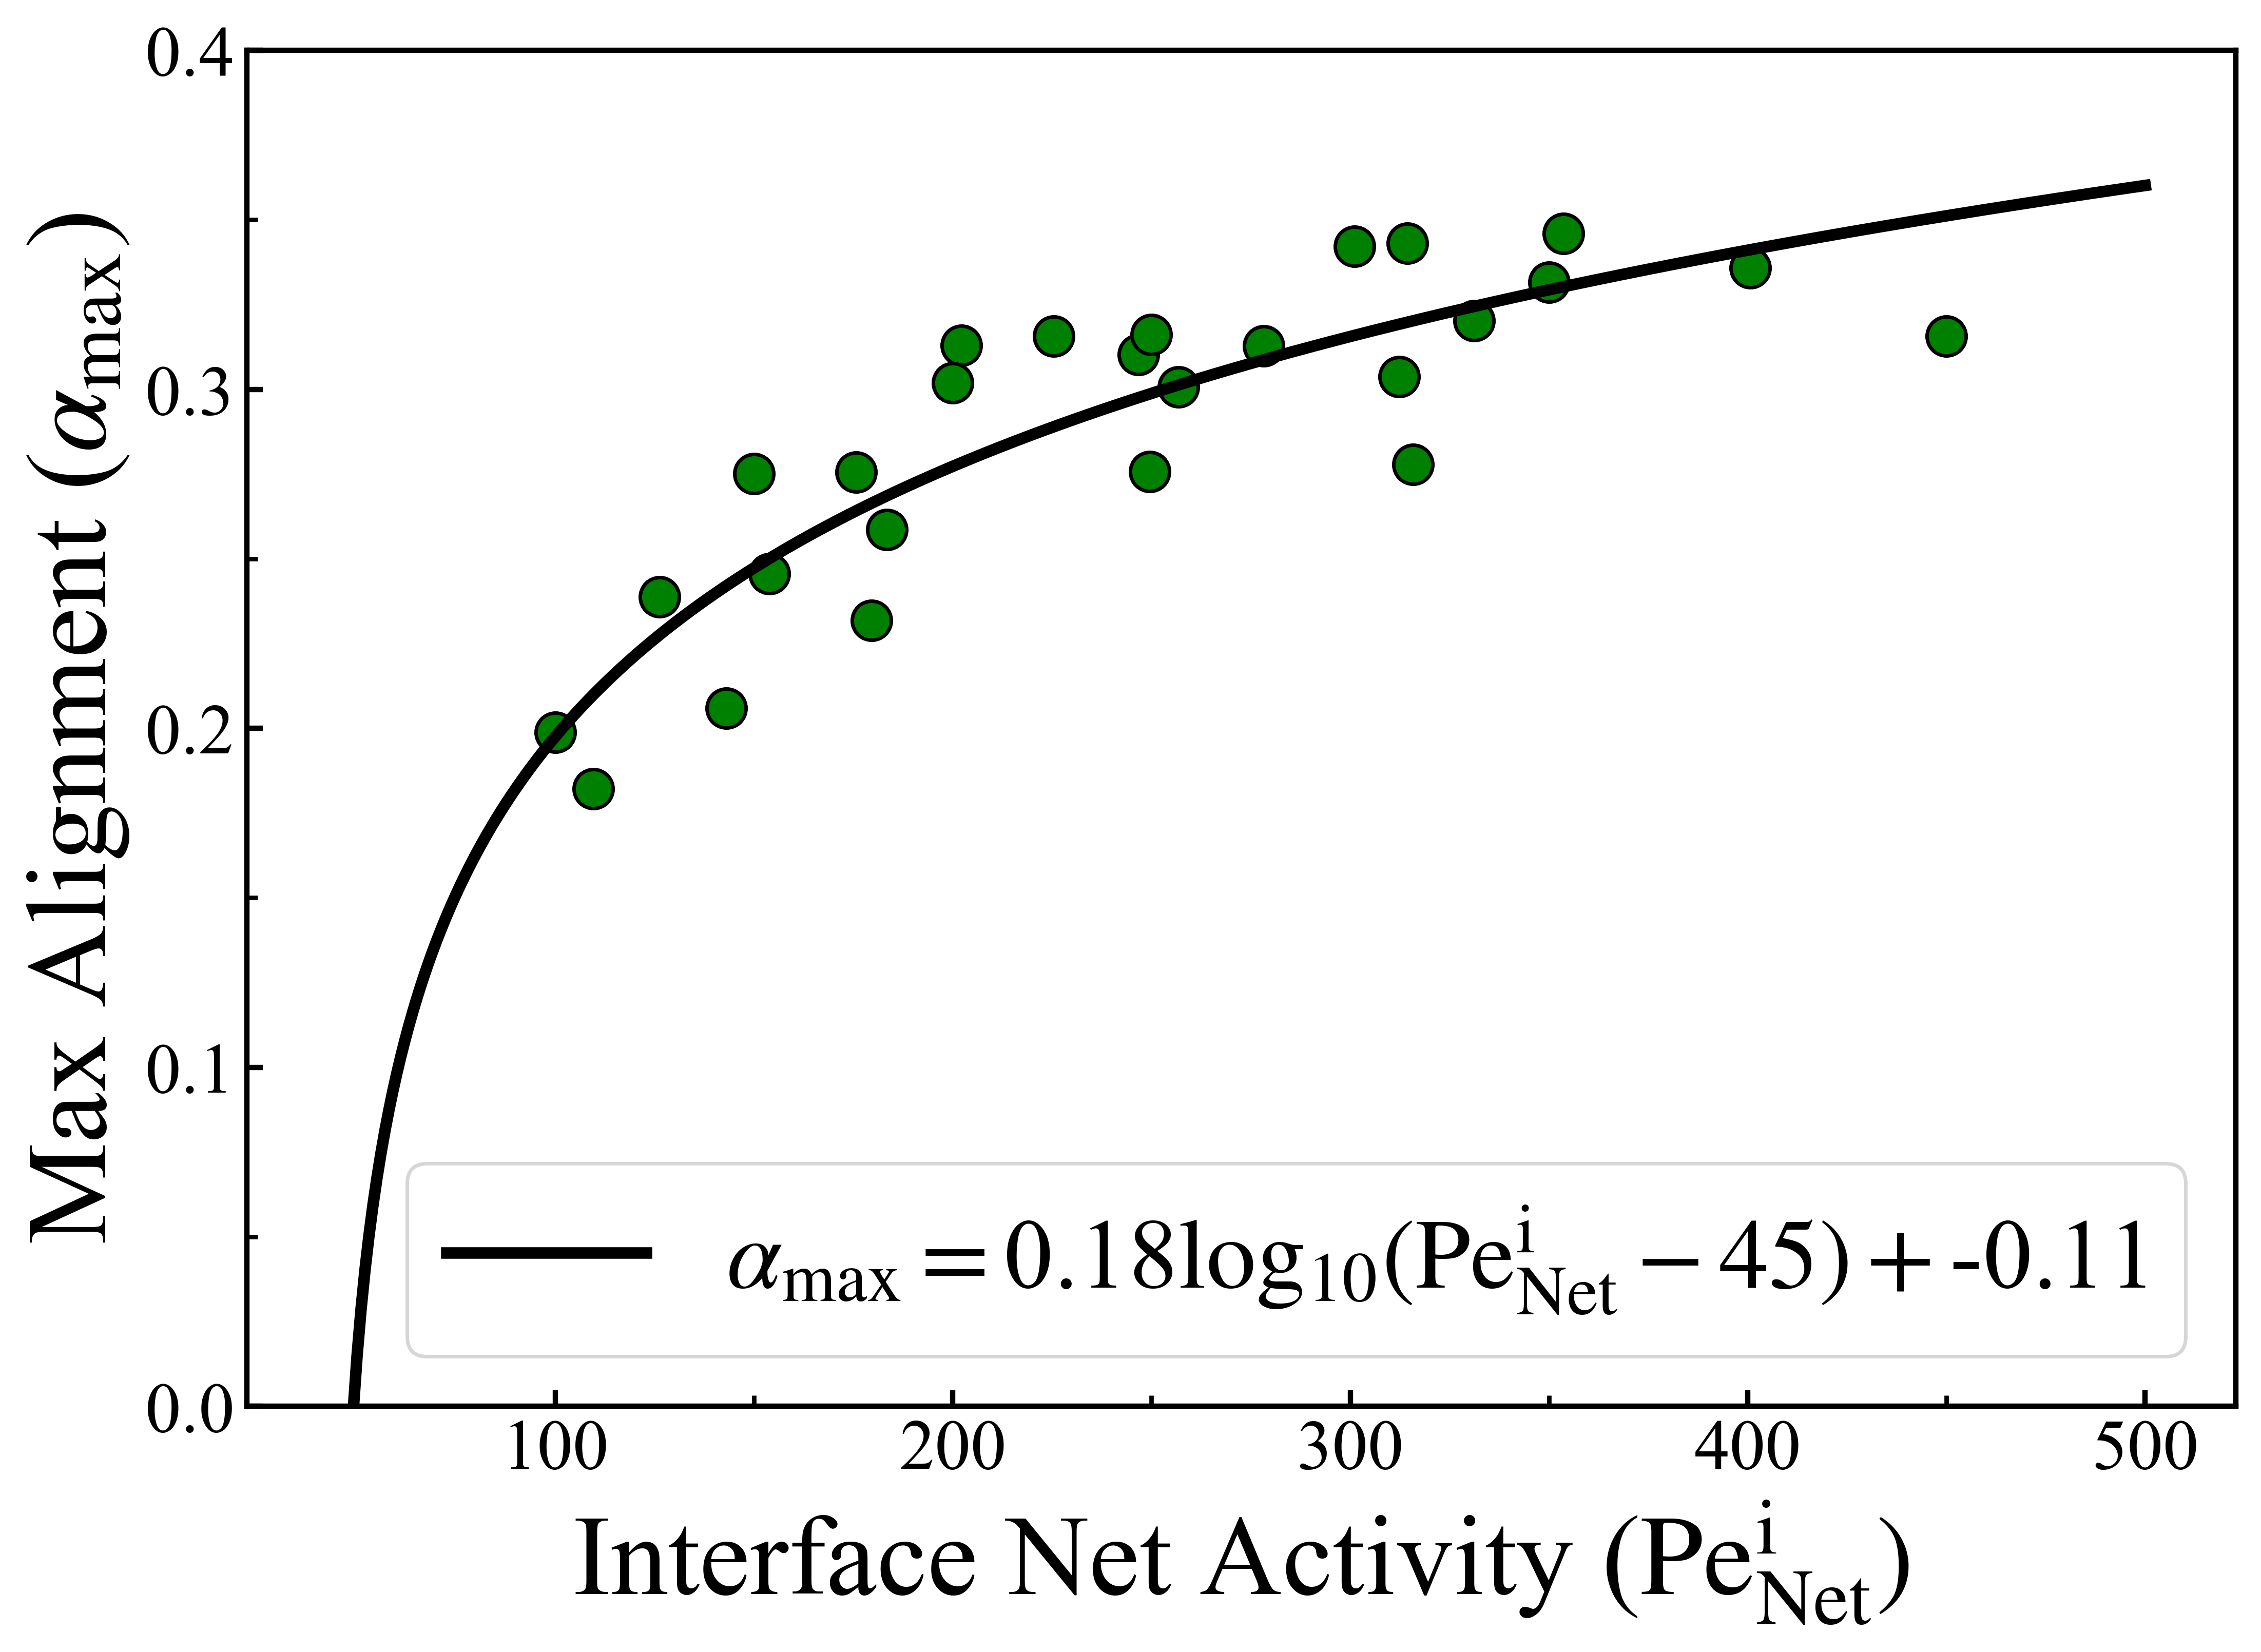

-6.130509350211215
36.15683593748717


<ipython-input-31-eda22345db43>:46: RuntimeWarning: invalid value encountered in log10
  y = A*np.log10(x-45)+B
<ipython-input-31-eda22345db43>:61: RuntimeWarning: invalid value encountered in log10
  plt.plot(x_span, np.log10((x_span-45))*fit_A + fit_B, color='black', linewidth=1.8*1.8, label=r'$h=$'+str(round(fit_A,2))+r'$\mathrm{log}_{10}(\mathrm{Pe}_\mathrm{S}-45)+$' + str(round(fit_B,2)))


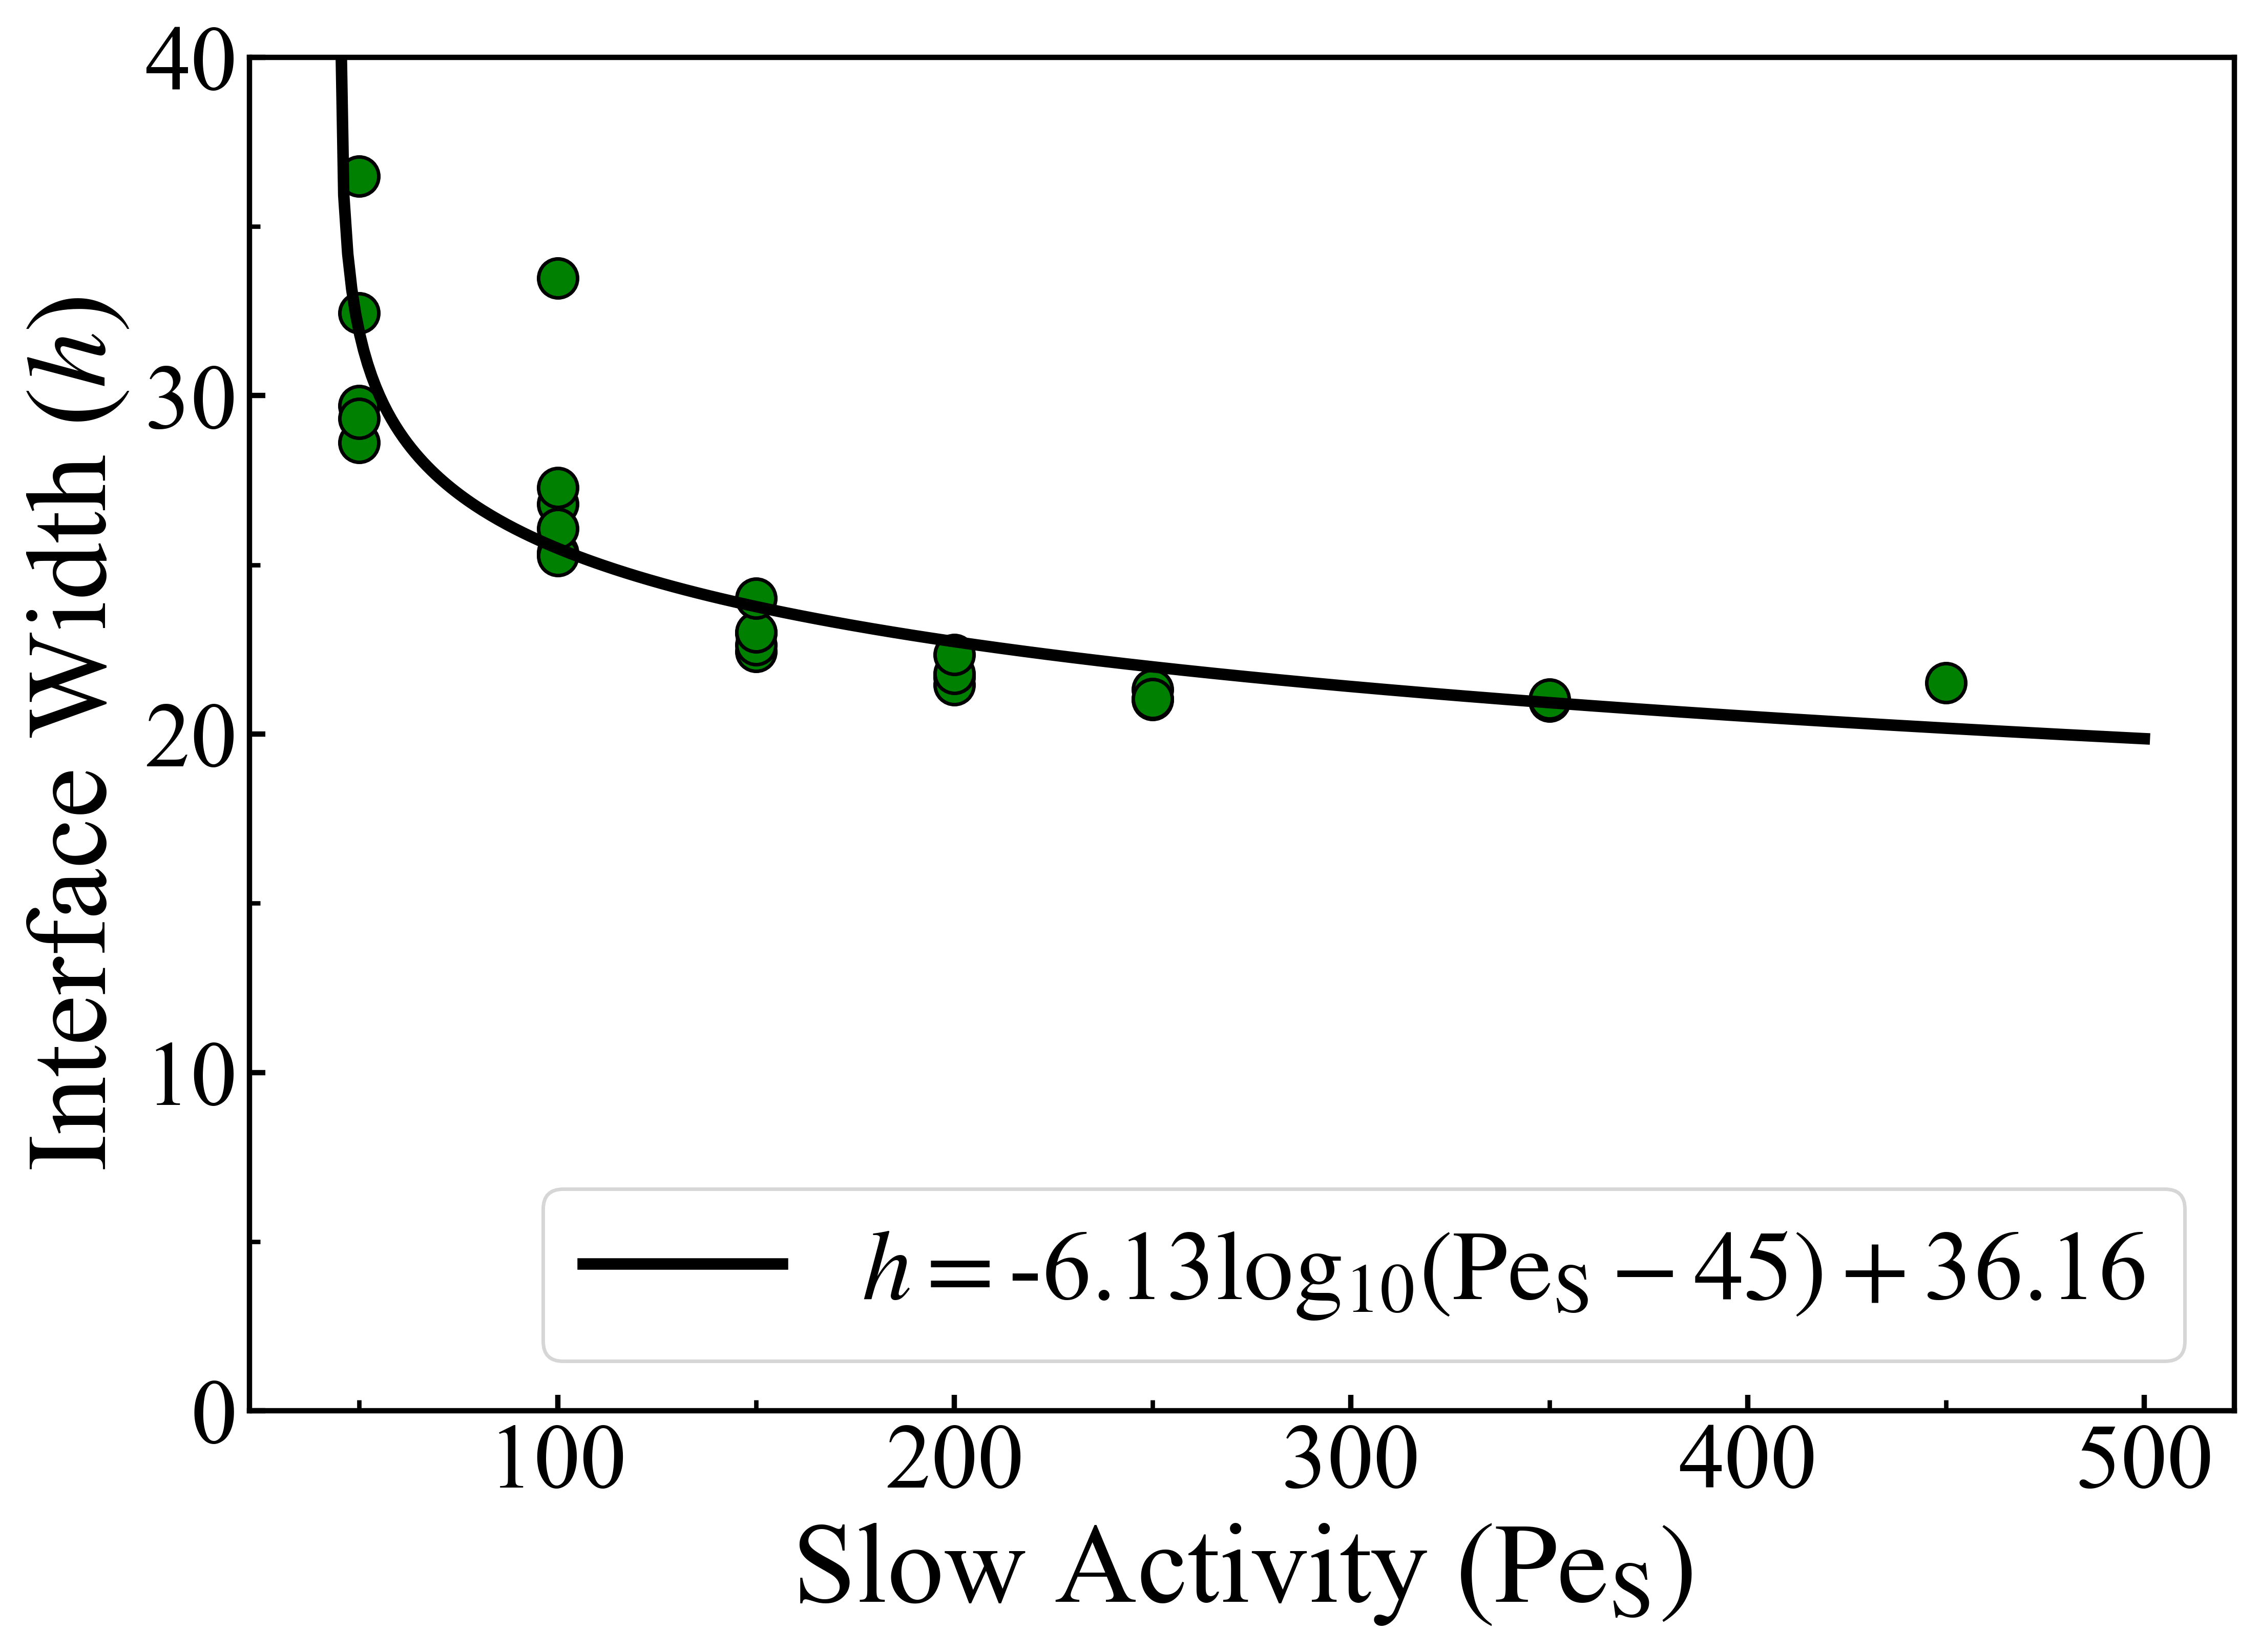

In [31]:
nonzero = np.where((int_width_mean > 10) & (int_width_mean < 50))
nonzero2 = np.where((int_width_mean < 10) | (int_width_mean > 50))
print(peA_arr[nonzero2])
print(peB_arr[nonzero2])
fig, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(pe_int_mean[nonzero], alpha_max_mean[nonzero], linewidths=1.0, edgecolor='black', facecolor='green', s=120.0)

def Gauss4(x, A, B):
    y = A*np.log10(x-45)+B
    return y

parameters, covariance = curve_fit(Gauss4, pe_int_mean[nonzero], alpha_max_mean[nonzero])

fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)
x_span = np.linspace(0, 500, num=500)

#fit_y = Gauss4(pe_int_theory, fit_A, fit_B)

loc = ticker.MultipleLocator(base=100)
ax1.xaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=50)
ax1.xaxis.set_minor_locator(loc)
plt.plot(x_span, np.log10((x_span-45))*fit_A + fit_B, color='black', linewidth=1.8*1.8, label=r'$\alpha_\mathrm{max}=$'+str(round(fit_A,2))+r'$\mathrm{log}_{10}(\mathrm{Pe}_\mathrm{Net}^\mathrm{i}-45)+$' + str(round(fit_B,2)))      

#ax1.text(0.68, 0.58, r'$\alpha(x)=\mathrm{A}_\alpha e^{-(x-\mathrm{B}_\alpha)^2/2 \mathrm{C}_\alpha^2}$', zorder=10,
#                                               transform=ax1.transAxes,
#                                               fontsize=28,fontdict={'fontname':'Helvetica'}, bbox=props)  
# Set y ticks
loc = ticker.MultipleLocator(base=0.1)
ax1.yaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=0.05)
ax1.yaxis.set_minor_locator(loc)

ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i})$', fontsize=32)
ax1.set_ylabel(r'Max Alignment ($\alpha_\mathrm{max}$)', fontsize=32)

plt.ylim(0, 0.4)
plt.legend(loc='lower right', fontsize=28)

plt.show()

def Gauss4(x, A, B):
    y = A*np.log10(x-45)+B
    return y

parameters, covariance = curve_fit(Gauss4, peA_arr[nonzero], int_width_mean[nonzero])

fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)
x_span = np.linspace(0, 500, num=500)

fit_y = Gauss4(radius_arr_final, fit_A, fit_B)

fig, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(peA_arr[nonzero], int_width_mean[nonzero], linewidths=1.0, edgecolor='black', facecolor='green', s=120.0)
plt.plot(x_span, np.log10((x_span-45))*fit_A + fit_B, color='black', linewidth=1.8*1.8, label=r'$h=$'+str(round(fit_A,2))+r'$\mathrm{log}_{10}(\mathrm{Pe}_\mathrm{S}-45)+$' + str(round(fit_B,2)))      

loc = ticker.MultipleLocator(base=100)
ax1.xaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=50)
ax1.xaxis.set_minor_locator(loc)
#ax1.text(0.68, 0.58, r'$\alpha(x)=\mathrm{A}_\alpha e^{-(x-\mathrm{B}_\alpha)^2/2 \mathrm{C}_\alpha^2}$', zorder=10,
#                                               transform=ax1.transAxes,
#                                               fontsize=28,fontdict={'fontname':'Helvetica'}, bbox=props)  
# Set y ticks
loc = ticker.MultipleLocator(base=10)
ax1.yaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=5)
ax1.yaxis.set_minor_locator(loc)
plt.ylim(0, 40)
ax1.tick_params(axis='x', labelsize=26)
ax1.tick_params(axis='y', labelsize=26)
ax1.set_xlabel(r'Slow Activity ($\mathrm{Pe}_\mathrm{S})$', fontsize=32)
ax1.set_ylabel(r'Interface Width ($h$)', fontsize=32)
plt.legend(loc='lower right', fontsize=28)
plt.show()

In [ ]:
align_peA=np.array([])
align_peB=np.array([])
align_peNet=np.array([])
first_align_peNet=np.array([])
first_interpart_peNet=np.array([])
first_interpart_peA=np.array([])
first_interpart_peB=np.array([])

align_xA=np.array([])
align_eps=np.array([])
align_pnum=np.array([])
align_phi=np.array([])
align_press_arr = np.array([])
first_align_press = np.array([])
first_bulk_press = np.array([])
first_align_peA=np.array([])
first_align_peB=np.array([])

width_peA=np.array([])
width_peB=np.array([])
width_peNet=np.array([])
width_xA=np.array([])
width_eps=np.array([])
width_pnum=np.array([])
width_phi=np.array([])

interpart_peA=np.array([])
interpart_peB=np.array([])
interpart_peNet=np.array([])
interpart_xA=np.array([])
interpart_eps=np.array([])
interpart_pnum=np.array([])
interpart_phi=np.array([])
interpart_press=np.array([])
interpart_press_expand=np.array([])
avg_shear=np.array([])
fastCol = '#e31a1c'
slowCol = '#081d58'

avg_rad = np.array([])
avg_width = np.array([])
avg_clust = np.array([])
avg_circularity = np.array([])

bulk_lat_time_mean = np.array([])
int_lat_time_mean = np.array([])
all_lat_time_mean = np.array([])
bulk_lat_time_std = np.array([])
int_lat_time_std = np.array([])
all_lat_time_std = np.array([])
from scipy.optimize import curve_fit


avg_bulk_nA = np.array([])
avg_bulk_nB = np.array([])
avg_bulk_n = np.array([])
avg_dense_nA = np.array([])
avg_dense_nB = np.array([])
avg_dense_n = np.array([])
avg_int_n = np.array([])
avg_int_nA = np.array([])
avg_int_nB = np.array([])
avg_gas_nA = np.array([])
avg_gas_nB = np.array([])
avg_gas_n = np.array([])

align_type = np.array([])
interpart_type = np.array([])

width_type = np.array([])

radius_arr_final = np.linspace(0,1.4,num=30)
num_dens_arr_final = np.zeros(30)
align_arr_final = np.zeros(30)
press_arr_final = np.zeros(30)
final_count = np.zeros(30)
final_count_count = np.zeros(30)

avg_int_theory_arr = np.array([])
avg_bulk_theory_arr = np.array([])
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / sigma) * ((2*(div**13)) - (div)**7)
    return dU

def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    peCritical = 40.
    if pe < peCritical:
        pe = 0
    else:
        pe -= peCritical
    magnitude = 6.
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
#     return (magnitude * (pe**power)) / (np.pi)
#     return (pe * (1. + (8./(np.pi**2.))))
    coeff = 1.92#3.0#1.92#2.03#3.5#2.03
    #coeff= 0.4053
    return (pe * coeff)

def conForRClust(pe, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out
def densProbability(r, activity_net, activity_slow):
    "Using similar triangles to find sides"
    gas_dense_dif_phi = 0.866 * np.log10(activity_net - 46.993) - 0.443
    rate_decay = -6.151 * np.log10(activity_net-49.921) - 4.392
    mid_point = 0.044 * np.log10(activity_slow-49.893) + 0.836
    gas_phi = -0.26 * np.log10(activity_slow-41.742)+0.783
    
    num_dens_r = ((gas_dense_dif_phi / (1+np.exp(-rate_decay * (r-mid_point)))) + gas_phi)
    
    return num_dens_r

def alignProbability(r, activity_net, activity_slow):
    "Using similar triangles to find sides"
    max_align = 0.2019 * np.log10(activity_net - 41.2803) - 0.1885
    mid_point = 0.0492 * np.log10(activity_slow - 47.0061) + 0.8220
    std_dev = 0.1057
    align_r = max_align * np.exp(-(r-mid_point)**2/(2*std_dev**2))
    
    return align_r
A_mean = np.array([])
B_mean = np.array([])
A_avg_time_arr = np.array([])
B_avg_time_arr = np.array([])
A_std = np.array([])
B_std = np.array([])
pe_int_mean = np.array([])
pe_gas_mean = np.array([])
pe_bulk_mean = np.array([])
pe_dense_mean = np.array([])
peA_arr = np.array([])
peB_arr = np.array([])
alpha_max_mean = np.array([])
int_width_mean = np.array([])
for i in range(0, len(all_dens)):
    if (params['peA'][i]>0) & (params['peB'][i]>0):
        if (params['peA'][i]!=50) & (params['peB'][i]!=50):
            if (params['peA'][i]!=50) & (params['peB'][i]!=100):
                print('start')
                print(params['peA'][i])
                print(params['peB'][i])
                if all_dens[i].empty:
                    continue

                for l in range(0, len(all_pres_new)):
                    if all_pres_new[l].empty:
                        continue
                    if params3['peA'][l]==params['peA'][i]:
                        if params3['peB'][l]==params['peB'][i]:

                            #if pres2[k][0:4]==dens[i][0:4]:

                                for q in range(0, len(all_pres_new2)):

                                    if all_pres_new2[q].empty:
                                        continue
                                    #if pres3[q][0:4]==dens[i][0:4]:
                                    if params4['peA'][q]==params['peA'][i]:
                                        if params4['peB'][q]==params['peB'][i]:
                                            A_arr = np.array([])
                                            B_arr = np.array([])
                                            A_arr2 = np.array([])
                                            B_arr2 = np.array([])
                                            C_arr2 = np.array([])

                                            time_i = all_dens[i]['tauB']
                                            time_l = all_pres_new[l]['tauB']
                                            time_q = all_pres_new2[q]['tauB']

                                            #Instantiate arrays for reading in number density .txt file
                                            bulk_nA_arr = np.array([])
                                            bulk_nB_arr = np.array([])
                                            bulk_n_arr = np.array([])
                                            int_n_arr = np.array([])
                                            int_nA_arr = np.array([])
                                            int_nB_arr = np.array([])
                                            gas_nA_arr = np.array([])
                                            gas_n_arr = np.array([])
                                            gas_nB_arr = np.array([])
                                            dense_nA_arr = np.array([])
                                            dense_nB_arr = np.array([])
                                            dense_n_arr = np.array([])

                                            #Instantiate arrays for reading in lattice spacing .txt file
                                            bulk_lat_mean = np.array([])
                                            int_lat_mean = np.array([])
                                            all_lat_mean = np.array([])
                                            bulk_lat_std = np.array([])
                                            int_lat_std = np.array([])
                                            all_lat_std = np.array([])

                                            rat_edge_arr = 0
                                            rat_edge_val = 0

                                            time_dens = np.array([])
                                            time_arr = np.array([])
                                            radius_arr = np.array([])
                                            align_arr = np.array([])
                                            num_dens_arr = np.array([])
                                            press_arr = np.array([])
                                            align_max_arr = np.array([])
                                            int_width_arr = np.array([])





                                            #Loop over time in interface pressure .txt file
                                            for j in range(0, len(time_i)):



                                                #Current time in loop
                                                time = time_i[j]
                                                if time>(0):


                                                    #Read values and set variables from number density .txt files
                                                    time_id_q = np.where(time_q==time)[0]
                                                    if len(time_id_q)>0:
                                                        time_id = np.where(time_i==time)[0]
                                                        time_id2 = np.where(time_l==time)[0]
                                                        if len(time_id2)>0:

                                                            if len(time_id2)==1:
                                                                edge_width = all_pres_new[l]['radius'][time_id2[0]]
                                                                edge_width2 = all_pres_new[l]['edge_width'][time_id2[0]]
                                                                nB = all_pres_new[l]['Nb'][time_id2[0]]
                                                                nA = all_pres_new[l]['Na'][time_id2[0]]
                                                                rat_edge = (edge_width - edge_width2) / edge_width
                                                                rat_edge_arr+= rat_edge
                                                                rat_edge_val += 1

                                                            elif len(time_id2)>1:
                                                                edge_width = np.max(all_pres_new[l]['radius'][time_id2])
                                                                edge_width2 = np.max(all_pres_new[l]['edge_width'][time_id2[0]])
                                                                rat_edge = (edge_width - edge_width2) / edge_width
                                                                rat_edge_arr+= rat_edge
                                                                rat_edge_val += 1

                                                                nB = np.max(all_pres_new[l]['Nb'][time_id2])
                                                                nA = np.max(all_pres_new[l]['Na'][time_id2])
                                                            if time not in time_arr:
                                                                time_arr = np.append(time_arr, time)  

                                                                bin_size = all_pres_new2[q]['sizeBin'][time_id_q]
                                                                bin_area = bin_size**2
                                                                bulk_nA_arr = np.append(bulk_nA_arr, all_pres_new2[q]['Na_bulk'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                                                                bulk_nB_arr = np.append(bulk_nB_arr, all_pres_new2[q]['Nb_bulk'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                                                                bulk_n_arr = np.append(bulk_n_arr, (all_pres_new2[q]['Nb_bulk'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                                                                int_n_arr = np.append(int_n_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Nb_int'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                                                                int_nA_arr = np.append(int_nA_arr, all_pres_new2[q]['Na_int'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                                                                int_nB_arr = np.append(int_nB_arr, all_pres_new2[q]['Nb_int'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                                                                gas_n_arr = np.append(gas_n_arr, (all_pres_new2[q]['Na_gas'][time_id_q] + all_pres_new2[q]['Nb_gas'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                                                                gas_nA_arr = np.append(gas_nA_arr, all_pres_new2[q]['Na_gas'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                                                                gas_nB_arr = np.append(gas_nB_arr, all_pres_new2[q]['Nb_gas'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                                                                dense_n_arr = np.append(dense_n_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Nb_int'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]+all_pres_new2[q]['Nb_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))
                                                                dense_nA_arr = np.append(dense_nA_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))
                                                                dense_nB_arr = np.append(dense_nB_arr, (all_pres_new2[q]['Nb_int'][time_id_q]+all_pres_new2[q]['Nb_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))

                                                                if len(time_arr)>=2:


                                                                    if len(radius_arr)>0:
                                                                        if np.max(radius_arr)<edge_width:
                                                                            num_dens_arr_temp = np.zeros(30)
                                                                            align_arr_temp = np.zeros(30)
                                                                            press_arr_temp = np.zeros(30)

                                                                            for k in range(0, len(radius_arr_final)-1):
                                                                                rad_where = np.where((radius_arr_final[k]<=radius_arr) & (radius_arr<radius_arr_final[k+1]))[0]
                                                                                if len(rad_where)>0:
                                                                                    nonzero_align = np.where(align_arr[rad_where]!=0)[0]
                                                                                    if len(nonzero_align)>0:
                                                                                        press_arr_final[k]+=np.mean(press_arr[rad_where][nonzero_align])
                                                                                        align_arr_final[k]+=np.mean(align_arr[rad_where][nonzero_align])
                                                                                        num_dens_arr_final[k]+=np.mean(num_dens_arr[rad_where][nonzero_align])
                                                                                        final_count[k]+=1
                                                                                        final_count_count[k]+=len(rad_where)

                                                                                        press_arr_temp[k]=np.mean(press_arr[rad_where][nonzero_align])
                                                                                        align_arr_temp[k]=np.mean(align_arr[rad_where][nonzero_align])
                                                                                        num_dens_arr_temp[k]=np.mean(num_dens_arr[rad_where][nonzero_align])
                                                                                        #temp_count[k]+=1
                                                                                        #temp_count_count[k]+=len(rad_where)

                                                                            align_max_arr = np.append(align_max_arr, np.max(align_arr_temp))
                                                                            int_width_arr = np.append(int_width_arr, edge_width2)
                                                                            fastSim = '#de2d26'
                                                                            fastTheory = '#fc9272'
                                                                            slowSim = '#3182bd'
                                                                            slowTheory = '#9ecae1'
                                                                            fsize=10

                                                                            slowTheory = '#081d58'
                                                                            fastTheory = '#e31a1c'
                                                                            press_arr_fit = press_arr_temp
                                                                            align_arr_fit = align_arr_temp
                                                                            num_dens_arr_fit = num_dens_arr_temp

                                                                            peNet_int = np.mean((int_nA_arr[-1]/int_n_arr[-1]) * float(params['peA'][i]) + (int_nB_arr[-1]/int_n_arr[-1]) * float(params['peB'][i]))

                                                                            #latNet_int = np.zeros(len(peNet_int))
                                                                            phi_cp = np.pi / (2*np.sqrt(3))
                                                                            #for z in range(0, len(peNet_int)):
                                                                            latNet_int = conForRClust(peNet_int-50, 1.0)

                                                                            phid_theory = (phi_cp / latNet_int**2) / (np.pi/4)


                                                                            phig_theory = (((3 * np.pi**2 * 4.5) / 4) * ((latNet_int * peNet_int)**(-1))) / (np.pi/4)


                                                                            def Gauss4(x, A, B):
                                                                                y = (phig_theory-phid_theory)/(1+np.exp(A*(x-B)))+phid_theory
                                                                                return y
                                                                            def Gauss(x, A, B, C):
                                                                                y = A*np.exp(-(x-B)**2/(2*C**2))
                                                                                return y

                                                                            rad_max = np.where(num_dens_arr_fit!=0)[0]



                                                                            parameters, covariance = curve_fit(Gauss4, radius_arr_final[rad_max], num_dens_arr_fit[rad_max])
                                                                            parameters2, covariance2 = curve_fit(Gauss, radius_arr_final[rad_max], align_arr_fit[rad_max])
                                                                            fit_A = parameters[0]
                                                                            #fit_B = parameters[1]
                                                                            fit_B = parameters[1]

                                                                            fit_A2 = parameters2[0]
                                                                            #fit_B = parameters[1]
                                                                            fit_B2 = parameters2[1]
                                                                            fit_C2 = parameters2[2]

                                                                            A_arr = np.append(A_arr, fit_A)
                                                                            B_arr = np.append(B_arr, fit_B)

                                                                            A_arr2 = np.append(A_arr2, fit_A2)
                                                                            B_arr2 = np.append(B_arr2, fit_B2)
                                                                            C_arr2 = np.append(C_arr2, np.abs(fit_C2))


                                                                            radius_arr = np.append(radius_arr, all_dens[i]['r_max'][j]/edge_width)   
                                                                            align_arr = np.append(align_arr, all_dens[i]['align'][j])   
                                                                            num_dens_arr = np.append(num_dens_arr, all_dens[i]['num_dens'][j])   
                                                                            press_arr = np.append(press_arr, all_dens[i]['press'][j])  

                                                                else:
                                                                    radius_arr = np.array([])
                                                                    align_arr = np.array([])
                                                                    num_dens_arr = np.array([])
                                                                    press_arr = np.array([])
                                                                    radius_arr = np.append(radius_arr, all_dens[i]['r_max'][j]/edge_width)   
                                                                    align_arr = np.append(align_arr, all_dens[i]['align'][j])   
                                                                    num_dens_arr = np.append(num_dens_arr, all_dens[i]['num_dens'][j])   
                                                                    press_arr = np.append(press_arr, all_dens[i]['press'][j])  



                                                            else:
                                                                radius_arr = np.append(radius_arr, all_dens[i]['r_max'][j]/edge_width)   
                                                                align_arr = np.append(align_arr, all_dens[i]['align'][j])   
                                                                num_dens_arr = np.append(num_dens_arr, all_dens[i]['num_dens'][j])   
                                                                press_arr = np.append(press_arr, all_dens[i]['press'][j]) 


                                            fastSim = '#de2d26'
                                            fastTheory = '#fc9272'
                                            slowSim = '#3182bd'
                                            slowTheory = '#9ecae1'
                                            fsize=10
                                            alpha_max_mean = np.append(alpha_max_mean, np.mean(align_max_arr))
                                            int_width_mean = np.append(int_width_mean, np.mean(int_width_arr))

                                            slowTheory = '#081d58'
                                            fastTheory = '#e31a1c'
                                            nonzero = np.where(final_count>0)[0]
                                            press_arr_fit = press_arr_final[nonzero] / final_count[nonzero]
                                            align_arr_fit = align_arr_final[nonzero] / final_count[nonzero]
                                            num_dens_arr_fit = num_dens_arr_final[nonzero] / final_count[nonzero]

                                            peNet_int = np.mean((int_nA_arr/int_n_arr) * float(params['peA'][i]) + (int_nB_arr/int_n_arr) * float(params['peB'][i]))

                                            #latNet_int = np.zeros(len(peNet_int))
                                            phi_cp = np.pi / (2*np.sqrt(3))
                                            #for z in range(0, len(peNet_int)):
                                            latNet_int = conForRClust(peNet_int-50, 1.0)

                                            phid_theory = (phi_cp / latNet_int**2) / (np.pi/4)


                                            phig_theory = (((3 * np.pi**2 * 4.5) / 4) * ((latNet_int * peNet_int)**(-1))) / (np.pi/4)
                                            print(phig_theory)
                                            print(phid_theory)
                                            print(np.mean(dense_n_arr))
                                            print(np.mean(gas_n_arr))


                                            def Gauss4(x, A, B):
                                                y = (phid_theory-phig_theory)/(1+np.exp(A*(x-B)))+phig_theory
                                                return y
                                            def Gauss(x, A, B, C):
                                                y = A*np.exp(-(x-B)**2/(2*C**2))
                                                return y

                                            rad_max = np.where(num_dens_arr_fit!=0)[0]



                                            parameters, covariance = curve_fit(Gauss4, radius_arr_final[nonzero][rad_max], num_dens_arr_fit[rad_max])
                                            parameters2, covariance2 = curve_fit(Gauss, radius_arr_final[nonzero][rad_max], align_arr_fit[rad_max])
                                            #parameters2, covariance2 = curve_fit(Gauss, radius_arr_final, num_dens_arr_temp)
                                            fit_A = parameters[0]
                                            #fit_B = parameters[1]
                                            fit_B = parameters[1]

                                            fit_A2 = parameters2[0]
                                            fit_B2 = parameters2[1]
                                            fit_C2 = parameters2[2]


                                            fig, ax1 = plt.subplots(figsize=(12,5))
                                            theory_max = np.max(num_dens_arr_fit[rad_max])
                                            sim_max = np.max(num_dens_arr_fit[rad_max])

                                            if sim_max >= theory_max:
                                                plot_max = sim_max+0.1
                                            else:
                                                plot_max = theory_max+0.1


                                            plot_min = 0

                                            step = np.round(np.abs(plot_max - plot_min)/6, 2)


                                            plt.plot(radius_arr_final[nonzero][rad_max], num_dens_arr_fit[rad_max],
                                                           c=slowTheory, lw=1.8*1.8, ls='--', label='Simulation')
                                            plt.plot(radius_arr_final[nonzero][rad_max], Gauss4(radius_arr_final[nonzero][rad_max], fit_A, fit_B),
                                                           c=fastTheory, lw=1.8*1.8, ls='-', label='Fit')

                                            ax1.set_xlim(0, 1.4)        
                                            # y limits


                                            ax1.set_ylim(plot_min, plot_max) 


                                            ax1.set_xlabel(r'Distance from CoM ($x=r/r_c$)', fontsize=fsize*2.8)



                                            ax1.set_ylabel(r'Number Density [$n(x)$]', fontsize=fsize*2.8)


                                            # Set all the x ticks for radial plots
                                            loc = ticker.MultipleLocator(base=0.2)
                                            ax1.xaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=0.1)
                                            ax1.xaxis.set_minor_locator(loc)


                                            # Set y ticks
                                            print(step)
                                            loc = ticker.MultipleLocator(base=step)
                                            ax1.yaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=round(step/2,3))
                                            ax1.yaxis.set_minor_locator(loc)
                                            # Left middle plot

                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)
                                            plt.legend(loc='upper right')


                                            plt.tight_layout()
                                            plt.savefig('/Volumes/External/dens_fit_time2/random_fit_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                            plt.close()

                                            fig, ax1 = plt.subplots(figsize=(12,5))
                                            theory_max = np.max(align_arr_fit[rad_max])
                                            sim_max = np.max(align_arr_fit[rad_max])

                                            if sim_max >= theory_max:
                                                plot_max = sim_max+0.1
                                            else:
                                                plot_max = theory_max+0.1


                                            plot_min = 0

                                            step = np.round(np.abs(plot_max - plot_min)/6, 2)


                                            plt.plot(radius_arr_final[nonzero][rad_max], align_arr_fit[rad_max],
                                                           c=slowTheory, lw=1.8*1.8, ls='--', label='Simulation')
                                            plt.plot(radius_arr_final[nonzero][rad_max], Gauss(radius_arr_final[nonzero][rad_max], fit_A2, fit_B2, fit_C2),
                                                           c=fastTheory, lw=1.8*1.8, ls='-', label='Fit')

                                            ax1.set_xlim(0, 1.4)        
                                            # y limits


                                            ax1.set_ylim(plot_min, plot_max) 


                                            ax1.set_xlabel(r'Distance from CoM ($x=r/r_c$)', fontsize=fsize*2.8)



                                            ax1.set_ylabel(r'Alignment [$\alpha(x)$]', fontsize=fsize*2.8)


                                            # Set all the x ticks for radial plots
                                            loc = ticker.MultipleLocator(base=0.2)
                                            ax1.xaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=0.1)
                                            ax1.xaxis.set_minor_locator(loc)


                                            # Set y ticks
                                            print(step)
                                            loc = ticker.MultipleLocator(base=step)
                                            ax1.yaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=round(step/2,3))
                                            ax1.yaxis.set_minor_locator(loc)
                                            # Left middle plot

                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)
                                            plt.legend(loc='upper right')


                                            plt.tight_layout()
                                            plt.savefig('/Volumes/External/align_fit_time2/random_fit_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                            plt.close()


                                            fig, ax1 = plt.subplots(figsize=(12,5))


                                            plot_max = 0.5


                                            plot_min = 0

                                            step = np.round(np.abs(plot_max - plot_min)/6, 2)


                                            plt.plot(time_arr[1:], align_max_arr,
                                                           c=slowTheory, lw=1.8*1.8, ls='--', label='Simulation')

                                            ax1.set_xlim(0, 100)        
                                            # y limits


                                            ax1.set_ylim(plot_min, plot_max) 


                                            ax1.set_xlabel(r'Time ($\tau$)', fontsize=fsize*2.8)



                                            ax1.set_ylabel(r'Alignment Max [$\alpha_{max}(x)$]', fontsize=fsize*2.8)


                                            # Set all the x ticks for radial plots
                                            loc = ticker.MultipleLocator(base=10)
                                            ax1.xaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=5)
                                            ax1.xaxis.set_minor_locator(loc)


                                            # Set y ticks
                                            print(step)
                                            loc = ticker.MultipleLocator(base=step)
                                            ax1.yaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=round(step/2,3))
                                            ax1.yaxis.set_minor_locator(loc)
                                            # Left middle plot

                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)
                                            plt.legend(loc='upper right')


                                            plt.tight_layout()
                                            plt.savefig('/Volumes/External/align_fit_time2/random_alpha_max_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                            plt.close()

                                            fig, ax1 = plt.subplots(figsize=(12,5))


                                            plot_max = np.max(int_width_arr) + 2


                                            plot_min = np.min(int_width_arr) - 2

                                            step = np.round(np.abs(plot_max - plot_min)/6, 2)


                                            plt.plot(time_arr[1:], int_width_arr,
                                                           c=slowTheory, lw=1.8*1.8, ls='--', label='Simulation')

                                            ax1.set_xlim(0, 100)        
                                            # y limits


                                            ax1.set_ylim(plot_min, plot_max) 


                                            ax1.set_xlabel(r'Time ($\tau$)', fontsize=fsize*2.8)



                                            ax1.set_ylabel(r'Interface Width [$h$]', fontsize=fsize*2.8)


                                            # Set all the x ticks for radial plots
                                            loc = ticker.MultipleLocator(base=10)
                                            ax1.xaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=5)
                                            ax1.xaxis.set_minor_locator(loc)


                                            # Set y ticks
                                            print(step)
                                            loc = ticker.MultipleLocator(base=step)
                                            ax1.yaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=round(step/2,3))
                                            ax1.yaxis.set_minor_locator(loc)
                                            # Left middle plot

                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)
                                            plt.legend(loc='upper right')


                                            plt.tight_layout()
                                            plt.savefig('/Volumes/External/align_fit_time2/random_int_width_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                            plt.close()

                                            fig, ax1 = plt.subplots(figsize=(12,5))
                                            plot_max = np.max(A_arr2)+1


                                            plot_min = np.min(A_arr2)-1
                                            print(plot_min)
                                            print(plot_max)
                                            step = np.round(np.abs(plot_max - plot_min)/6, 2)


                                            plt.plot(time_arr[1:], A_arr2,
                                                           c=slowTheory, lw=1.8*1.8, ls='--')

                                            ax1.set_xlim(0, 100)        
                                            # y limits


                                            ax1.set_ylim(plot_min, plot_max) 


                                            ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                            ax1.set_ylabel(r'$A_\alpha$', fontsize=fsize*2.8)


                                            # Set all the x ticks for radial plots
                                            loc = ticker.MultipleLocator(base=20)
                                            ax1.xaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=10)
                                            ax1.xaxis.set_minor_locator(loc)


                                            # Set y ticks
                                            print(step)
                                            loc = ticker.MultipleLocator(base=step)
                                            ax1.yaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=round(step/2,3))
                                            ax1.yaxis.set_minor_locator(loc)
                                            # Left middle plot

                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                            plt.tight_layout()
                                            plt.savefig('/Volumes/External/align_fit_time2/random_fit_a_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                            plt.close()

                                            fig, ax1 = plt.subplots(figsize=(12,5))
                                            plot_max = np.max(B_arr2)+0.05


                                            plot_min = np.min(B_arr2)-0.05
                                            step = np.round(np.abs(plot_max - plot_min)/6,2)
                                            if step < 0:
                                                step = step * -1


                                            plt.plot(time_arr[1:], B_arr2,
                                                           c=slowTheory, lw=1.8*1.8, ls='--')

                                            ax1.set_xlim(0, 100)        
                                            # y limits


                                            ax1.set_ylim(plot_min, plot_max) 


                                            ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                            ax1.set_ylabel(r'$B_\alpha$', fontsize=fsize*2.8)


                                            # Set all the x ticks for radial plots
                                            loc = ticker.MultipleLocator(base=20)
                                            ax1.xaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=10)
                                            ax1.xaxis.set_minor_locator(loc)


                                            # Set y ticks
                                            print(step)
                                            loc = ticker.MultipleLocator(base=step)
                                            ax1.yaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=round(step/2,3))
                                            ax1.yaxis.set_minor_locator(loc)
                                            # Left middle plot
                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                            plt.tight_layout()
                                            plt.savefig('/Volumes/External/align_fit_time2/random_fit_b_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                            plt.close()

                                            fig, ax1 = plt.subplots(figsize=(12,5))
                                            plot_max = np.max(C_arr2)+0.05


                                            plot_min = np.min(C_arr2)-0.05
                                            step = np.round(np.abs(plot_max - plot_min)/6,2)
                                            if step < 0:
                                                step = step * -1


                                            plt.plot(time_arr[1:], C_arr2,
                                                           c=slowTheory, lw=1.8*1.8, ls='--')

                                            ax1.set_xlim(0, 100)        
                                            # y limits


                                            ax1.set_ylim(plot_min, plot_max) 


                                            ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                            ax1.set_ylabel(r'$C_\alpha$', fontsize=fsize*2.8)


                                            # Set all the x ticks for radial plots
                                            loc = ticker.MultipleLocator(base=20)
                                            ax1.xaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=10)
                                            ax1.xaxis.set_minor_locator(loc)


                                            # Set y ticks
                                            print(step)
                                            loc = ticker.MultipleLocator(base=step)
                                            ax1.yaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=round(step/2,3))
                                            ax1.yaxis.set_minor_locator(loc)
                                            # Left middle plot
                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                            plt.tight_layout()
                                            plt.savefig('/Volumes/External/align_fit_time2/random_fit_c_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                            plt.close()




                                            A_avg_time_arr = np.append(A_avg_time_arr, fit_A)
                                            B_avg_time_arr = np.append(B_avg_time_arr, fit_B)



                                            fig, ax1 = plt.subplots(figsize=(12,5))
                                            plot_max = np.max(A_arr)+1


                                            plot_min = np.min(A_arr)-1
                                            print(plot_min)
                                            print(plot_max)
                                            step = np.round(np.abs(plot_max - plot_min)/6, 2)


                                            plt.plot(time_arr[1:], A_arr,
                                                           c=slowTheory, lw=1.8*1.8, ls='--')

                                            ax1.set_xlim(0, 100)        
                                            # y limits


                                            ax1.set_ylim(plot_min, plot_max) 


                                            ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                            ax1.set_ylabel(r'$B_\mathrm{n}$', fontsize=fsize*2.8)


                                            # Set all the x ticks for radial plots
                                            loc = ticker.MultipleLocator(base=20)
                                            ax1.xaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=10)
                                            ax1.xaxis.set_minor_locator(loc)


                                            # Set y ticks
                                            print(step)
                                            loc = ticker.MultipleLocator(base=step)
                                            ax1.yaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=round(step/2,3))
                                            ax1.yaxis.set_minor_locator(loc)
                                            # Left middle plot

                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                            plt.tight_layout()
                                            plt.savefig('/Volumes/External/dens_fit_time2/random_fit_b_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                            plt.close()

                                            fig, ax1 = plt.subplots(figsize=(12,5))
                                            plot_max = np.max(B_arr)+0.05


                                            plot_min = np.min(B_arr)-0.05
                                            step = np.round(np.abs(plot_max - plot_min)/6,2)
                                            if step < 0:
                                                step = step * -1


                                            plt.plot(time_arr[1:], B_arr,
                                                           c=slowTheory, lw=1.8*1.8, ls='--')

                                            ax1.set_xlim(0, 100)        
                                            # y limits


                                            ax1.set_ylim(plot_min, plot_max) 


                                            ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                            ax1.set_ylabel(r'$C_\mathrm{n}$', fontsize=fsize*2.8)


                                            # Set all the x ticks for radial plots
                                            loc = ticker.MultipleLocator(base=20)
                                            ax1.xaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=10)
                                            ax1.xaxis.set_minor_locator(loc)


                                            # Set y ticks
                                            print(step)
                                            loc = ticker.MultipleLocator(base=step)
                                            ax1.yaxis.set_major_locator(loc)
                                            loc = ticker.MultipleLocator(base=round(step/2,3))
                                            ax1.yaxis.set_minor_locator(loc)
                                            # Left middle plot
                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                            plt.tight_layout()
                                            plt.savefig('/Volumes/External/dens_fit_time2/random_fit_c_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                            plt.close()



                                            pe_int_mean = np.append(pe_int_mean, np.mean((int_nA_arr/int_n_arr) * float(params['peA'][i]) + (int_nB_arr/int_n_arr) * float(params['peB'][i])))
                                            pe_gas_mean = np.append(pe_gas_mean, np.mean((gas_nA_arr/gas_n_arr) * float(params['peA'][i]) + (gas_nB_arr/gas_n_arr) * float(params['peB'][i])))
                                            pe_bulk_mean = np.append(pe_bulk_mean, np.mean((bulk_nA_arr/bulk_n_arr) * float(params['peA'][i]) + (bulk_nB_arr/bulk_n_arr) * float(params['peB'][i])))
                                            pe_dense_mean = np.append(pe_dense_mean, np.mean((dense_nA_arr/dense_n_arr) * float(params['peA'][i]) + (dense_nB_arr/dense_n_arr) * float(params['peB'][i])))

                                            A_mean = np.append(A_mean, np.mean(A_arr))
                                            B_mean = np.append(B_mean, np.mean(B_arr))
                                            sum_A = 0
                                            for z in range(0, len(A_arr)):
                                                sum_A += (A_arr[z] - A_mean[-1]) ** 2
                                            A_std = np.append(A_std, (sum_A / len(A_arr))**0.5)

                                            sum_B = 0
                                            for z in range(0, len(B_arr)):
                                                sum_B += (B_arr[z] - B_mean[-1]) ** 2
                                            B_std = np.append(B_std, (sum_B / len(B_arr))**0.5)


                                            peA_arr = np.append(peA_arr, params['peA'][i])
                                            peB_arr = np.append(peB_arr, params['peB'][i])
                                        


start
100
150


/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/scipy/optimize/minpack.py:807: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/scipy/optimize/minpack.py:807: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


8.326366212774312e-19
-38.77286816549949


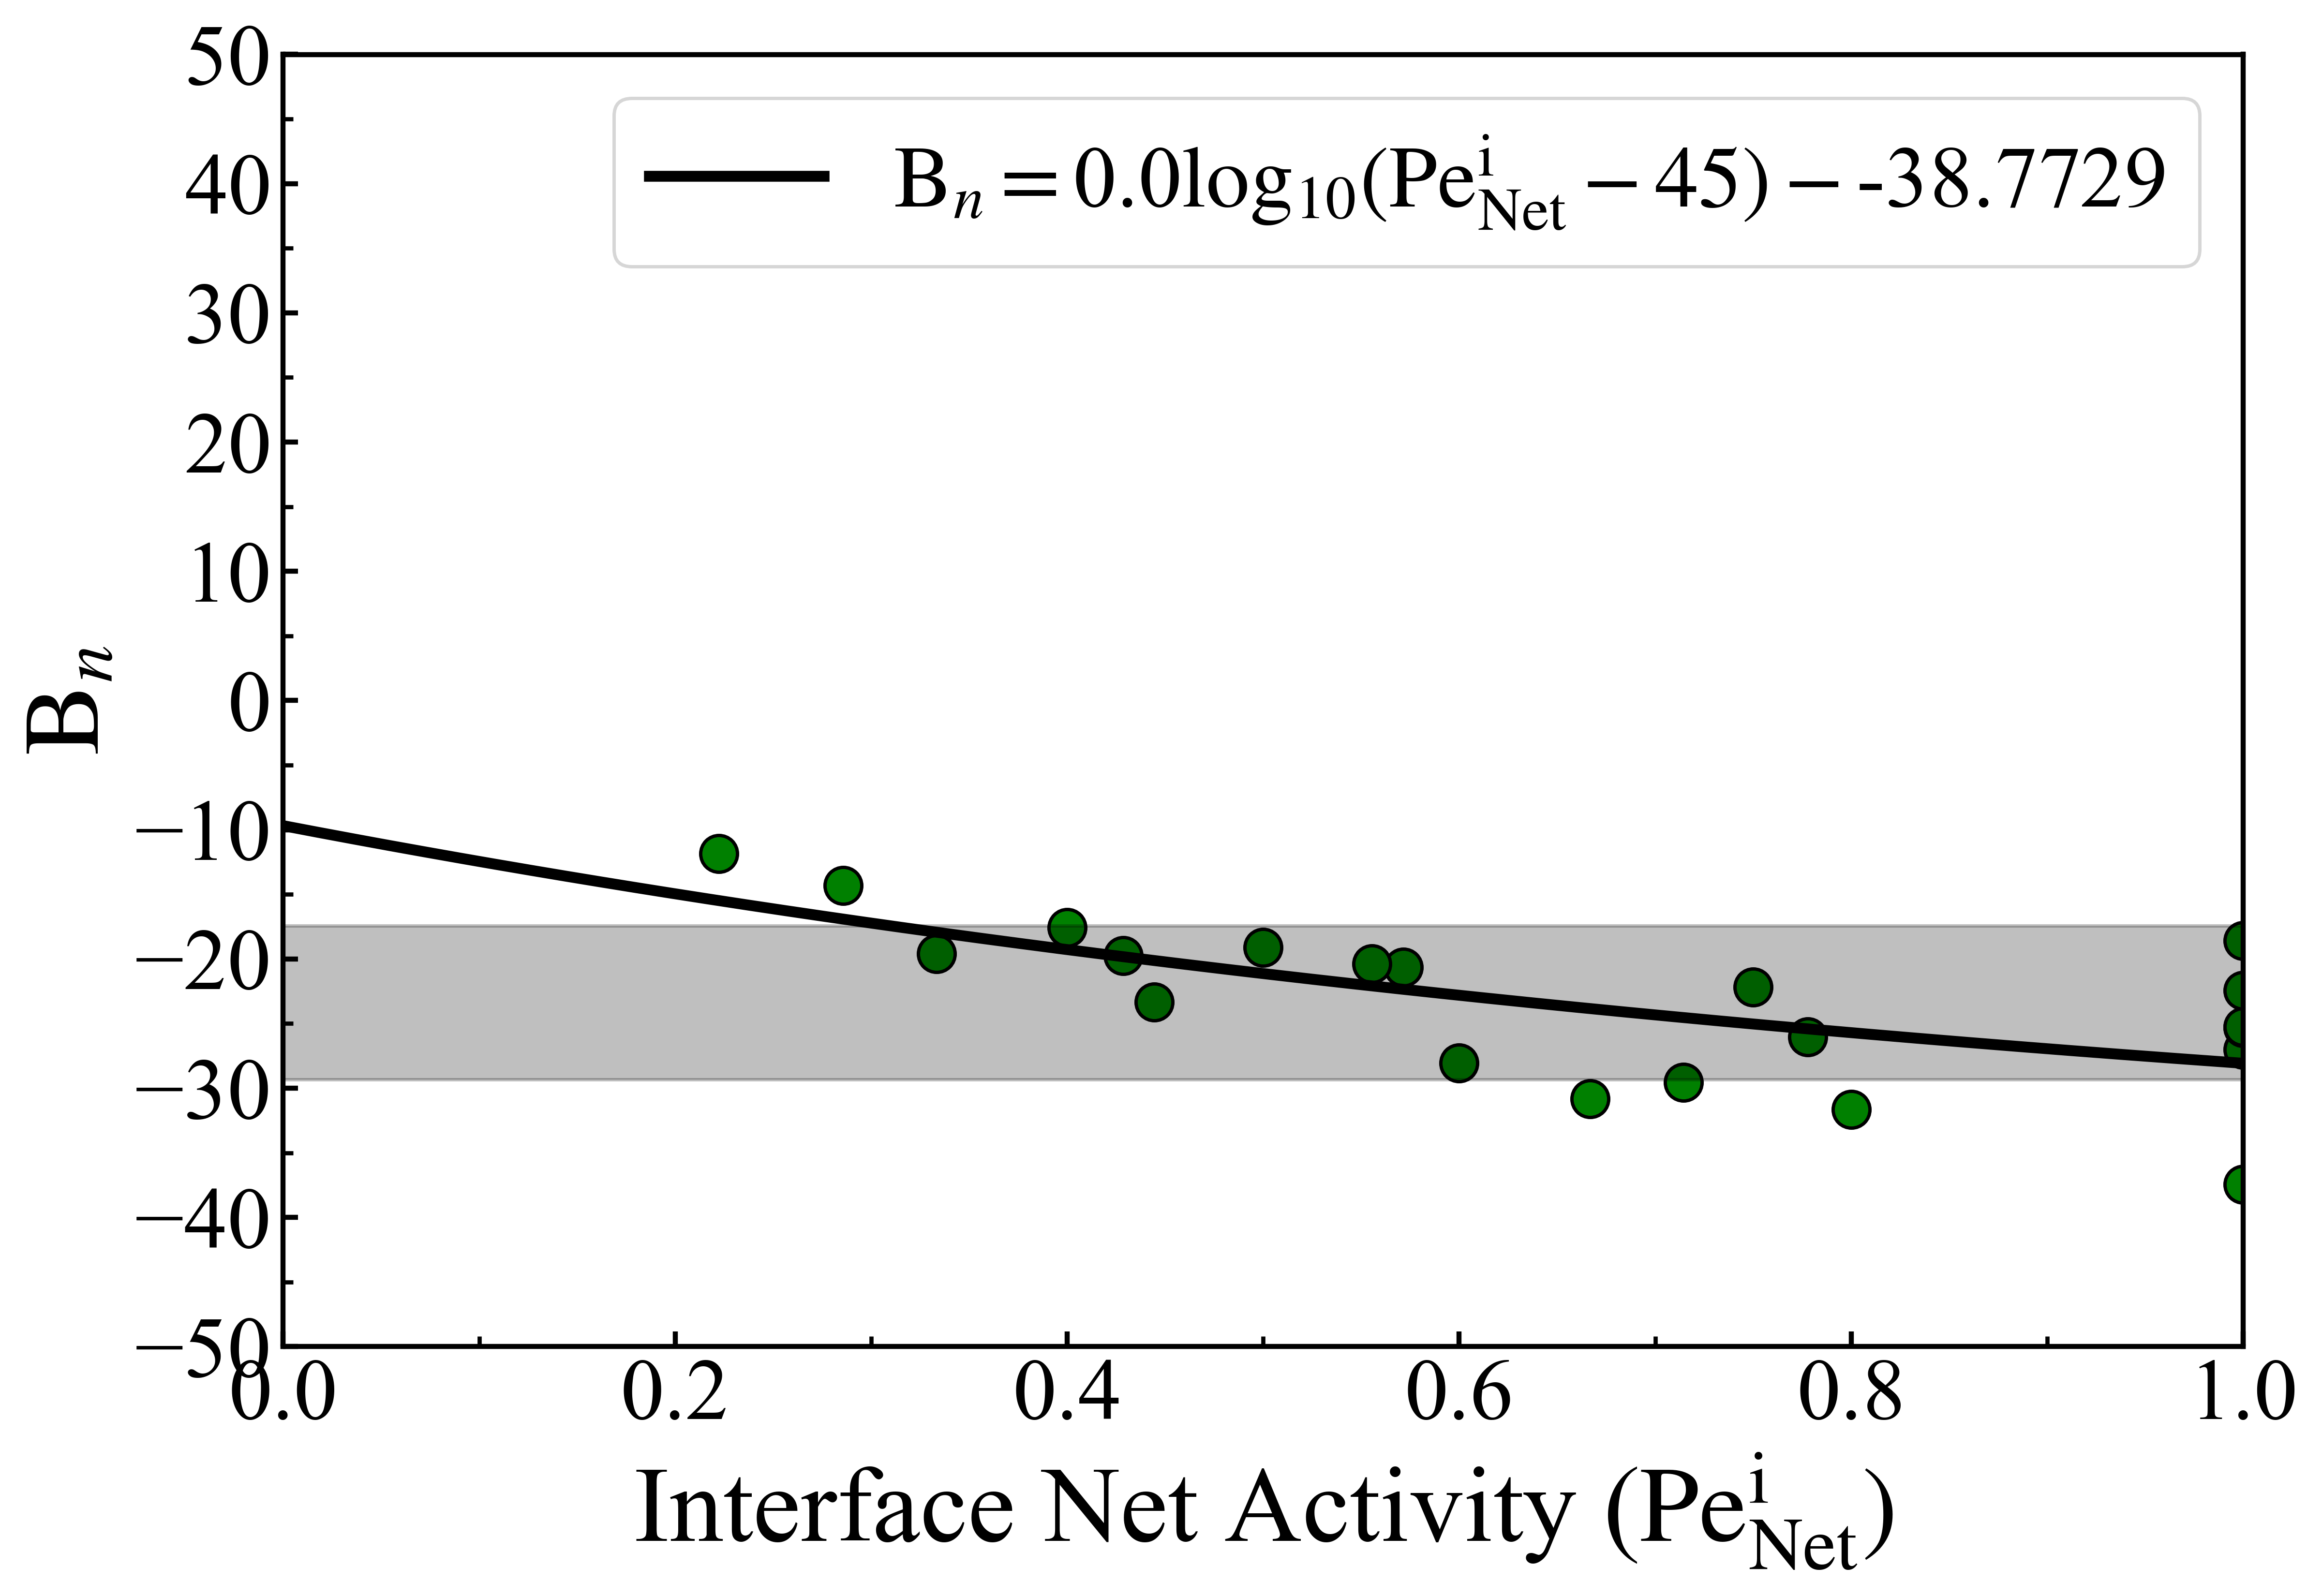

13.860438625930843
-54.88653272952483


<ipython-input-83-e3062267dccf>:93: RuntimeWarning: invalid value encountered in log10
  y = A*np.log10(x-45)+B
<ipython-input-83-e3062267dccf>:112: RuntimeWarning: invalid value encountered in log10
  plt.plot(x_span, np.log10(x_span-45)*fit_A + fit_B, color='black', linewidth=1.8*1.8, label=r'$\mathrm{B}_n=$'+str(round(fit_A,4))+r'$\mathrm{log}_{10}(\mathrm{Pe}_\mathrm{Net}^\mathrm{i}-45)-$' + str(round(fit_B,4)))


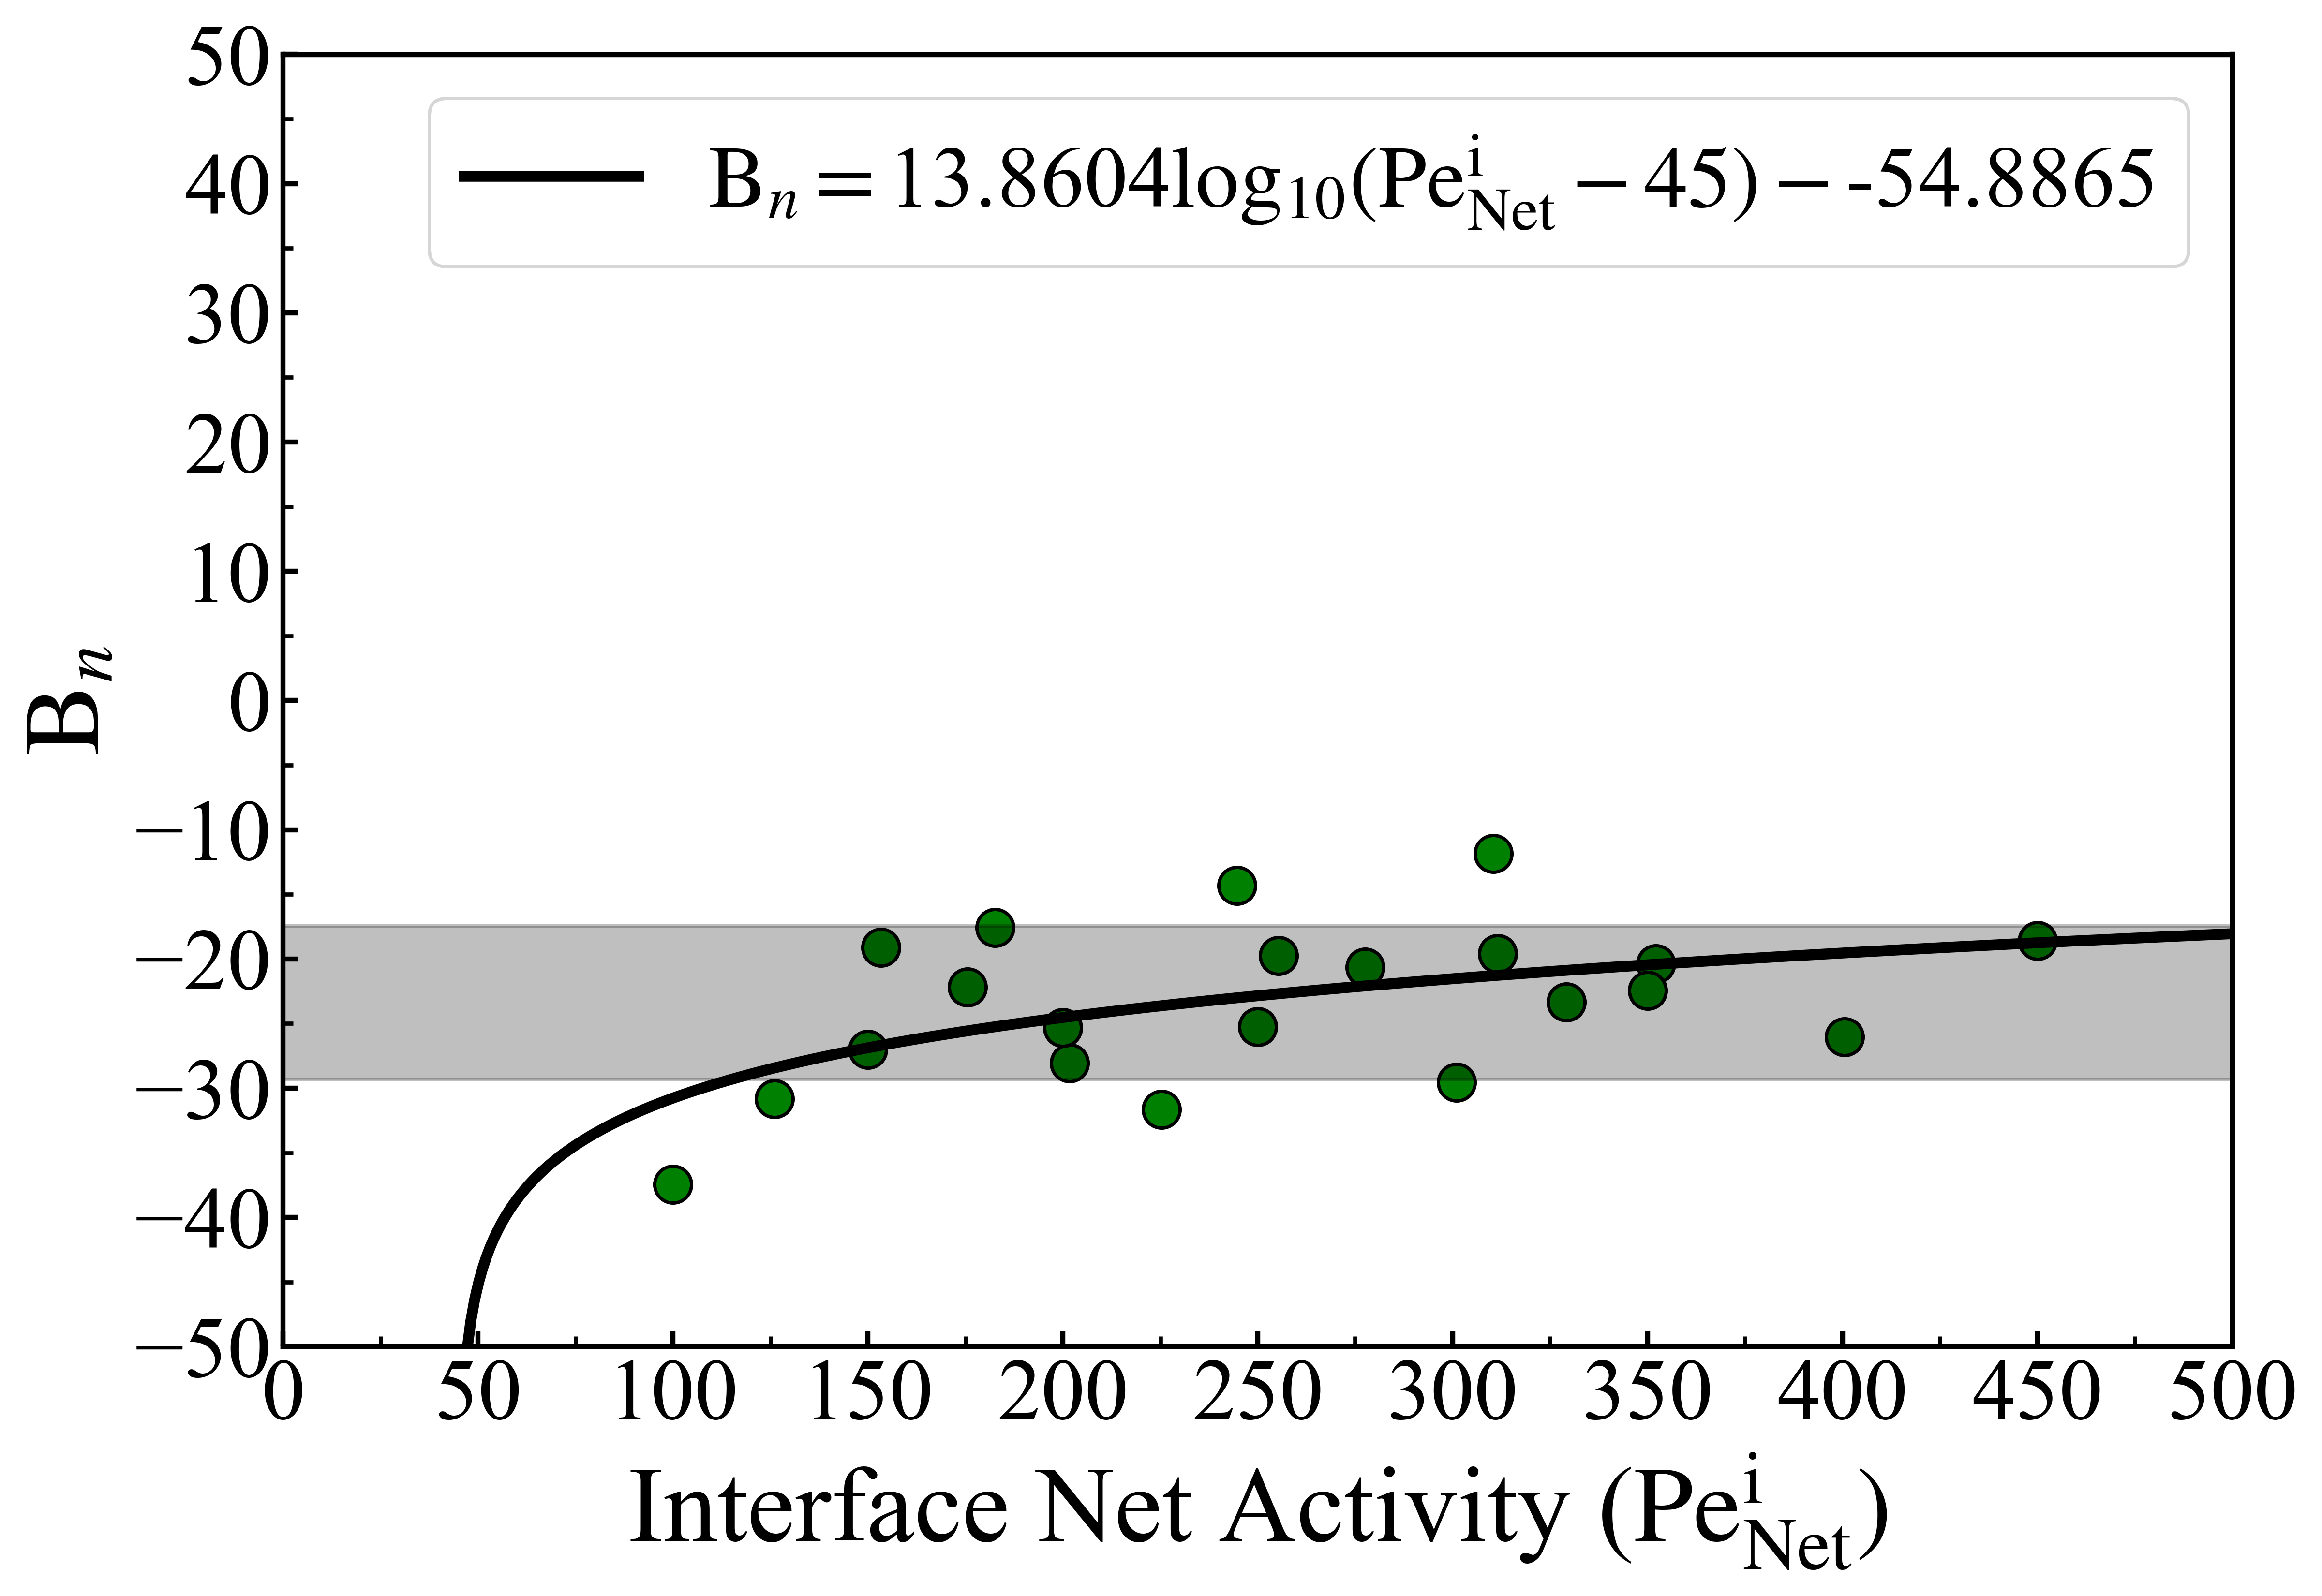

0.029590133632345823
0.8750675606083527


<ipython-input-83-e3062267dccf>:149: RuntimeWarning: invalid value encountered in log10
  y = A*np.log10(x-45)+B
<ipython-input-83-e3062267dccf>:168: RuntimeWarning: invalid value encountered in log10
  plt.plot(x_span, np.log10(x_span-45)*fit_A + fit_B, color='black', linewidth=1.8*1.8, label=r'$\mathrm{C}_n=$'+str(round(fit_A,4))+r'$\mathrm{log}_{10}(\mathrm{Pe}_\mathrm{Net}^\mathrm{i}-45)-$' + str(round(fit_B,4)))


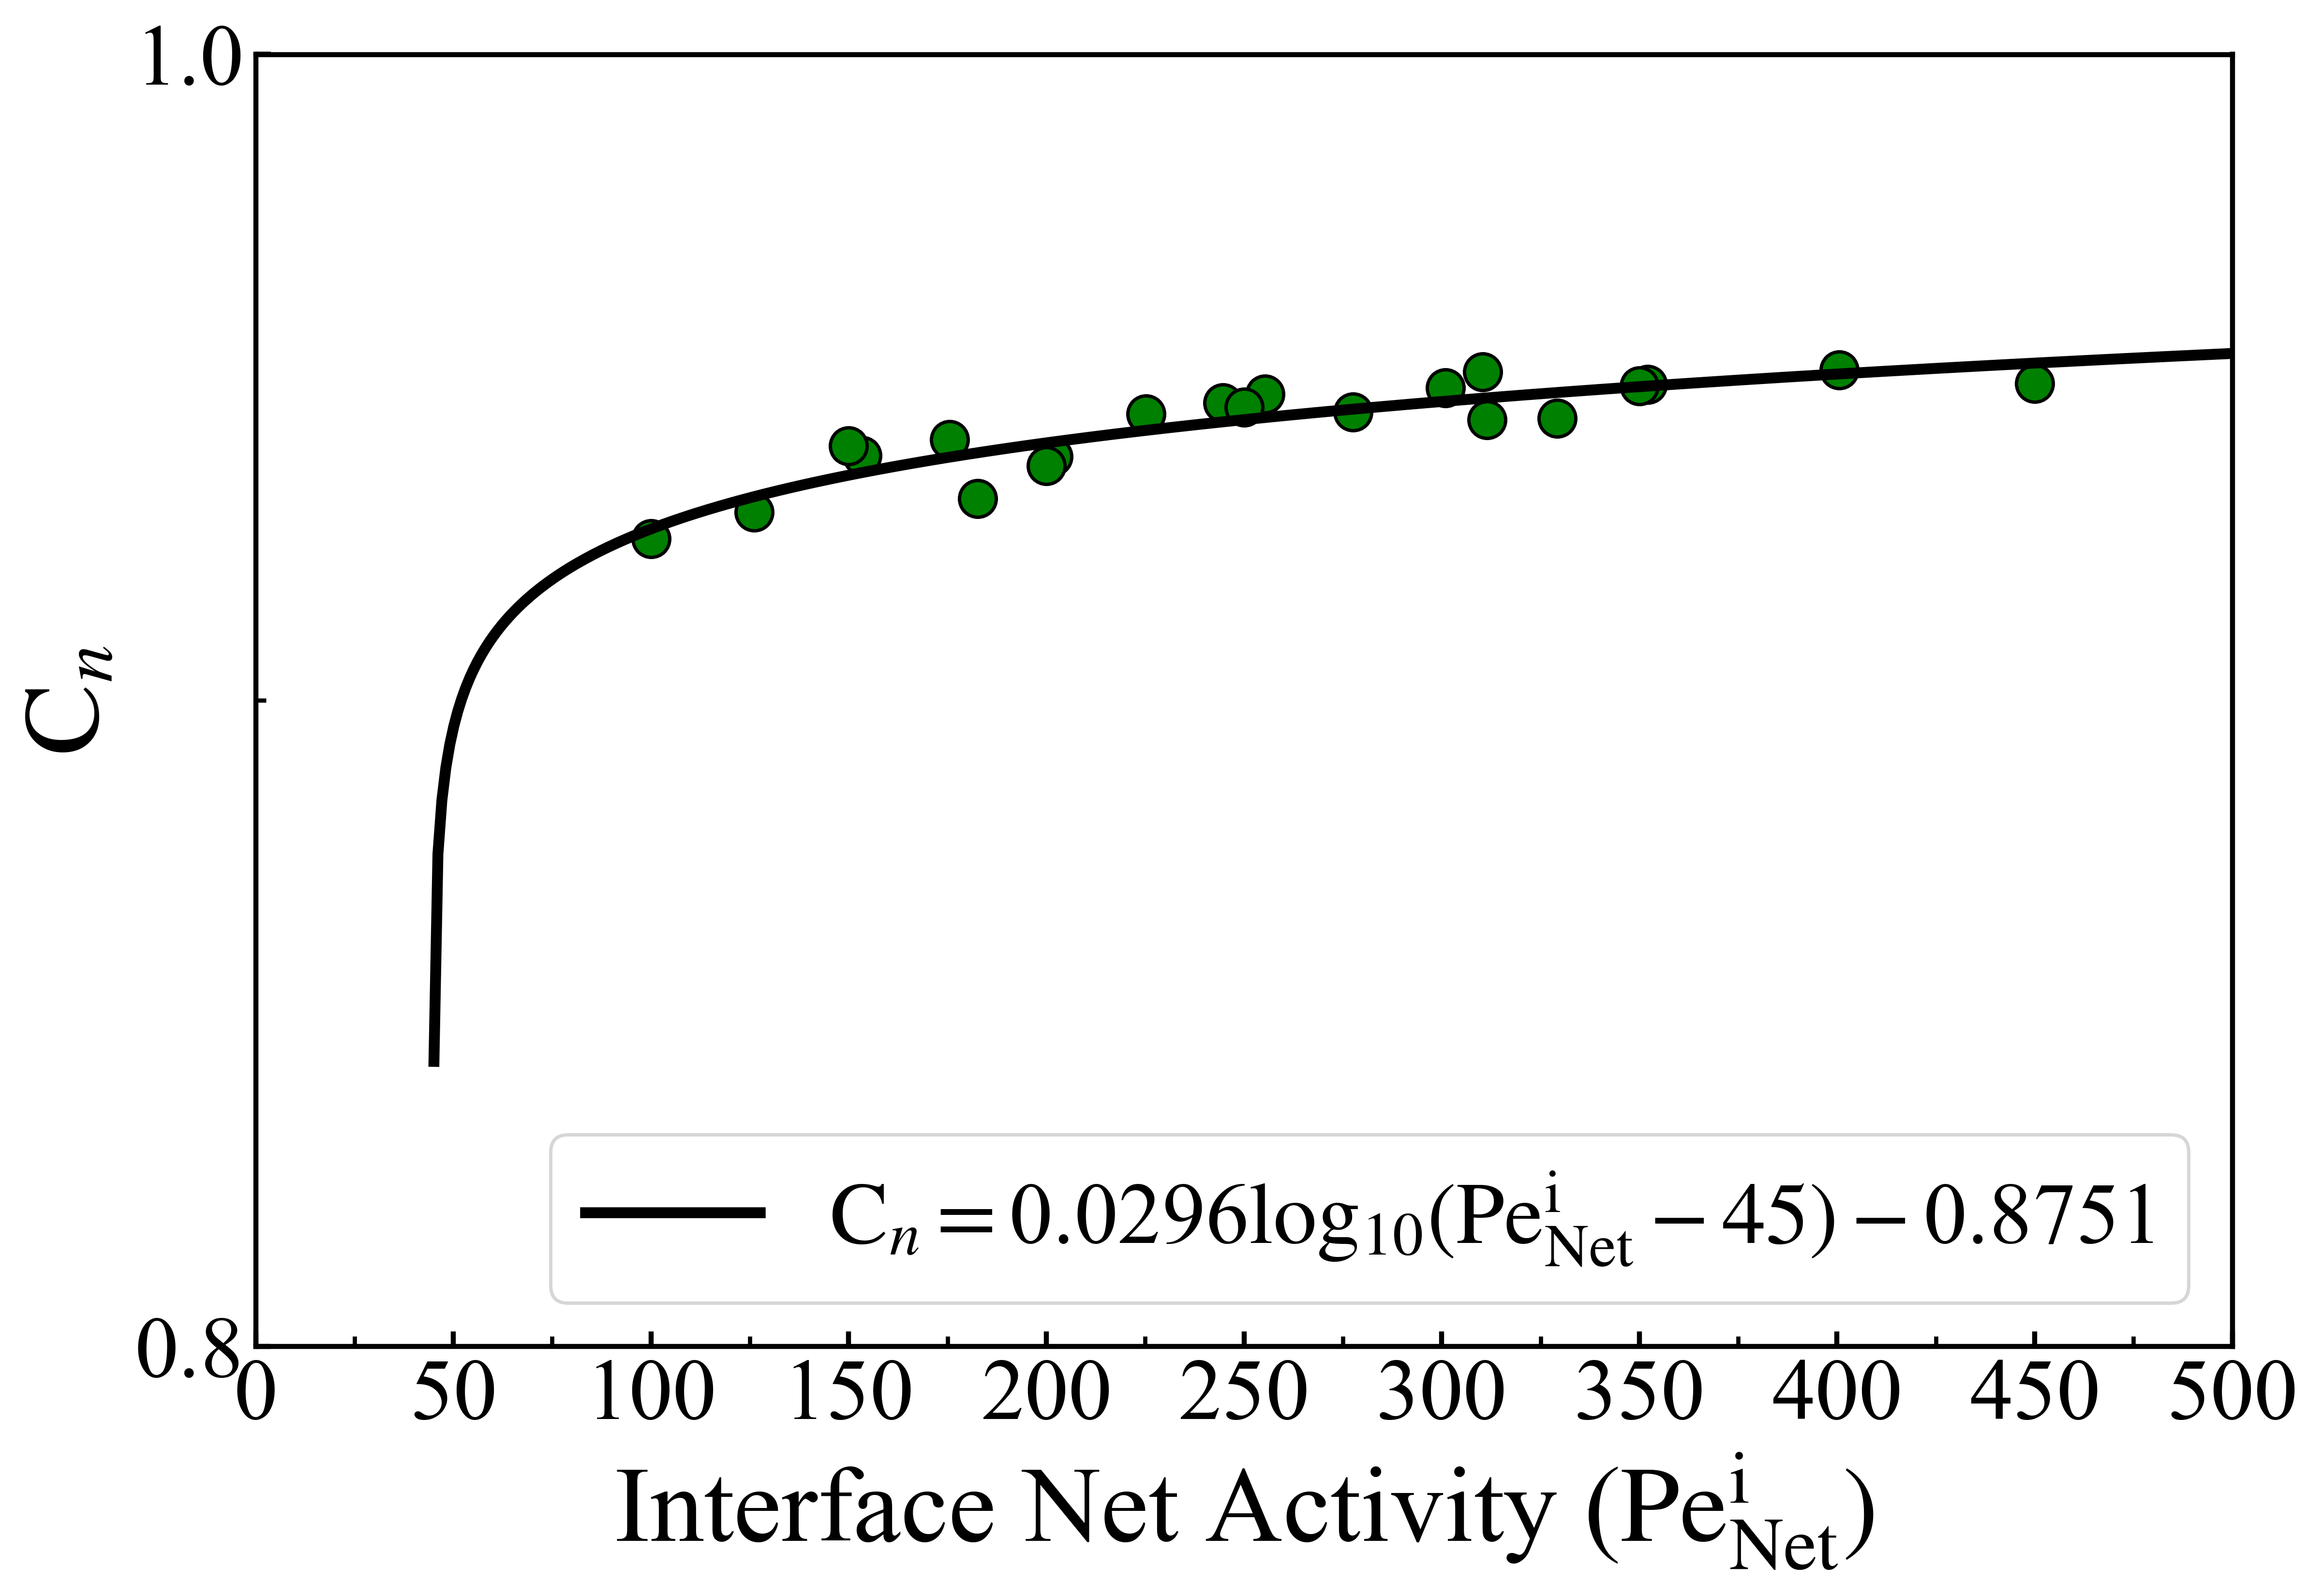

In [83]:
fast = np.where((interpart_type==0) & (interpart_peA >50))[0]
rand = np.where((interpart_type==1) & (interpart_peA >50))[0]
slow = np.where((interpart_type==2) & (interpart_peB >50))[0]
fsize=10
fast_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor=fastCol,
                      markerfacecolor='None', 
                      label='Fast Interface', markersize=(2.4*msz * mkSz[0])))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor='purple',
                      markerfacecolor='None', 
                      label='Homogeneous', markersize=(2.4*msz * mkSz[0])))
#Define colors for plots    
yellow = ("#fdfd96")
green = ("#77dd77")
red = ("#ff6961")
purple = ("#cab2d6")
std = 0

nonzero = np.where(A_mean<1000000)[0]

fig, ax1 = plt.subplots(figsize=(10,7))

std = 0
for k in range(0, len(A_mean[nonzero])):
    std += (A_mean[nonzero][k]-np.mean(A_mean[nonzero]))**2
std_beta = (std/len(A_mean[nonzero]))**0.5

def Gauss4(x, A, B):
    y = A*np.exp(-(x-45))+B
    return y

parameters, covariance = curve_fit(Gauss4, peA_arr[nonzero]/peB_arr[nonzero], A_mean[nonzero])

fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)
x_span = np.linspace(0, 1, num=500)

fit_y = Gauss4(radius_arr_final, fit_A, fit_B)

y_arr = np.ones(2) * np.mean(A_mean[nonzero])
x_arr = np.array([0, 500])
y_arr_min = y_arr - std_beta
y_arr_max = y_arr + std_beta
#pe_int_mean[nonzero]
ax1.scatter(peA_arr[nonzero]/peB_arr[nonzero], A_mean[nonzero], linewidths=1.0, edgecolor='black', facecolor='green', s=120.0)
plt.plot(x_span, np.exp(-(x_span-45))*fit_A + fit_B, color='black', linewidth=1.8*1.8, label=r'$\mathrm{B}_n=$'+str(round(fit_A,4))+r'$\mathrm{log}_{10}(\mathrm{Pe}_\mathrm{Net}^\mathrm{i}-45)-$' + str(round(fit_B,4)))      
ax1.fill_between(x_arr, y_arr_min, y_arr_max, color='black', alpha=0.25)
# Set all the x ticks for radial plots
loc = ticker.MultipleLocator(base=0.2)
ax1.xaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=0.1)
ax1.xaxis.set_minor_locator(loc)
props = dict(boxstyle='square', facecolor='white', edgecolor='none', alpha=0.85, pad=0.1)
#ax1.text(0.68, 0.58, r'$\alpha(x)=\mathrm{A}_\alpha e^{-(x-\mathrm{B}_\alpha)^2/2 \mathrm{C}_\alpha^2}$', zorder=10,
#                                               transform=ax1.transAxes,
#                                               fontsize=28,fontdict={'fontname':'Helvetica'}, bbox=props)  
# Set y ticks
loc = ticker.MultipleLocator(base=10)
ax1.yaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=5)
ax1.yaxis.set_minor_locator(loc)
                                    
    
ax1.tick_params(axis='x', labelsize=26)
ax1.tick_params(axis='y', labelsize=26)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i})$', fontsize=32)
ax1.set_ylabel(r'$\mathrm{B}_n$', fontsize=32)
ax1.set_ylim([-50,50])
ax1.set_xlim([0,1.0])
plt.legend(loc='upper right', fontsize=26)

plt.tight_layout()
plt.show()

fig, ax1 = plt.subplots(figsize=(10,7))

std = 0
for k in range(0, len(A_mean[nonzero])):
    std += (A_mean[nonzero][k]-np.mean(A_mean[nonzero]))**2
std_beta = (std/len(A_mean[nonzero]))**0.5

def Gauss4(x, A, B):
    y = A*np.log10(x-45)+B
    return y

parameters, covariance = curve_fit(Gauss4, pe_int_mean[nonzero], A_mean[nonzero])

fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)
x_span = np.linspace(0, 500, num=500)

fit_y = Gauss4(radius_arr_final, fit_A, fit_B)

y_arr = np.ones(2) * np.mean(A_mean[nonzero])
x_arr = np.array([0, 500])
y_arr_min = y_arr - std_beta
y_arr_max = y_arr + std_beta
#pe_int_mean[nonzero]
ax1.scatter(pe_int_mean[nonzero], A_mean[nonzero], linewidths=1.0, edgecolor='black', facecolor='green', s=120.0)
plt.plot(x_span, np.log10(x_span-45)*fit_A + fit_B, color='black', linewidth=1.8*1.8, label=r'$\mathrm{B}_n=$'+str(round(fit_A,4))+r'$\mathrm{log}_{10}(\mathrm{Pe}_\mathrm{Net}^\mathrm{i}-45)-$' + str(round(fit_B,4)))      
ax1.fill_between(x_arr, y_arr_min, y_arr_max, color='black', alpha=0.25)
# Set all the x ticks for radial plots
loc = ticker.MultipleLocator(base=50)
ax1.xaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=25)
ax1.xaxis.set_minor_locator(loc)
props = dict(boxstyle='square', facecolor='white', edgecolor='none', alpha=0.85, pad=0.1)
#ax1.text(0.68, 0.58, r'$\alpha(x)=\mathrm{A}_\alpha e^{-(x-\mathrm{B}_\alpha)^2/2 \mathrm{C}_\alpha^2}$', zorder=10,
#                                               transform=ax1.transAxes,
#                                               fontsize=28,fontdict={'fontname':'Helvetica'}, bbox=props)  
# Set y ticks
loc = ticker.MultipleLocator(base=10)
ax1.yaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=5)
ax1.yaxis.set_minor_locator(loc)
                                    
    
ax1.tick_params(axis='x', labelsize=26)
ax1.tick_params(axis='y', labelsize=26)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i})$', fontsize=32)
ax1.set_ylabel(r'$\mathrm{B}_n$', fontsize=32)
ax1.set_ylim([-50,50])
ax1.set_xlim([0,500.0])
plt.legend(loc='upper right', fontsize=26)

plt.tight_layout()
plt.show()

fig, ax1 = plt.subplots(figsize=(10,7))

std = 0
for k in range(0, len(B_mean[nonzero])):
    std += (B_mean[nonzero][k]-np.mean(B_mean[nonzero]))**2
std_beta = (std/len(B_mean[nonzero]))**0.5

def Gauss4(x, A, B):
    y = A*np.log10(x-45)+B
    return y

parameters, covariance = curve_fit(Gauss4, pe_int_mean[nonzero], B_mean[nonzero])

fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)
x_span = np.linspace(0, 500, num=500)

fit_y = Gauss4(radius_arr_final, fit_A, fit_B)

y_arr = np.ones(2) * np.mean(B_mean[nonzero])
x_arr = np.array([0, 500])
y_arr_min = y_arr - std_beta
y_arr_max = y_arr + std_beta

ax1.scatter(pe_int_mean[nonzero], B_mean[nonzero], linewidths=1.0, edgecolor='black', facecolor='green', s=120.0)
plt.plot(x_span, np.log10(x_span-45)*fit_A + fit_B, color='black', linewidth=1.8*1.8, label=r'$\mathrm{C}_n=$'+str(round(fit_A,4))+r'$\mathrm{log}_{10}(\mathrm{Pe}_\mathrm{Net}^\mathrm{i}-45)-$' + str(round(fit_B,4)))      

# Set all the x ticks for radial plots
loc = ticker.MultipleLocator(base=50)
ax1.xaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=25)
ax1.xaxis.set_minor_locator(loc)
props = dict(boxstyle='square', facecolor='white', edgecolor='none', alpha=0.85, pad=0.1)
#ax1.text(0.68, 0.58, r'$\alpha(x)=\mathrm{A}_\alpha e^{-(x-\mathrm{B}_\alpha)^2/2 \mathrm{C}_\alpha^2}$', zorder=10,
#                                               transform=ax1.transAxes,
#                                               fontsize=28,fontdict={'fontname':'Helvetica'}, bbox=props)  
# Set y ticks
loc = ticker.MultipleLocator(base=0.2)
ax1.yaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=0.1)
ax1.yaxis.set_minor_locator(loc)
                                    
    
ax1.tick_params(axis='x', labelsize=26)
ax1.tick_params(axis='y', labelsize=26)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i})$', fontsize=32)
ax1.set_ylabel(r'$\mathrm{C}_n$', fontsize=32)
ax1.set_ylim([0.8,1.0])
ax1.set_xlim([0,500.0])
plt.legend(loc='lower right', fontsize=26)

plt.tight_layout()
plt.show()